In [279]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import math
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

<b> Question 1: Create a python function to load data from your local directory, and display the top few rows of data </b>

In [133]:
original=pd.read_csv("housing_data.csv")
print(original.head(15))

                   date      price  bedrooms  bathrooms  sqft_living  \
0   2014-05-02 00:00:00   313000.0       3.0       1.50         1340   
1   2014-05-02 00:00:00  2384000.0       5.0       2.50         3650   
2   2014-05-02 00:00:00   342000.0       3.0       2.00         1930   
3   2014-05-02 00:00:00   420000.0       3.0       2.25         2000   
4   2014-05-02 00:00:00   550000.0       4.0       2.50         1940   
5   2014-05-02 00:00:00   490000.0       2.0       1.00          880   
6   2014-05-02 00:00:00   335000.0       2.0       2.00         1350   
7   2014-05-02 00:00:00   482000.0       4.0       2.50         2710   
8   2014-05-02 00:00:00   452500.0       3.0       2.50         2430   
9   2014-05-02 00:00:00   640000.0       4.0       2.00         1520   
10  2014-05-02 00:00:00   463000.0       3.0       1.75         1710   
11  2014-05-02 00:00:00  1400000.0       4.0       2.50         2920   
12  2014-05-02 00:00:00   588500.0       3.0       1.75         

<b> Question 2: How many data samples are present in the data set? what attributes/features are continous valued? which attributes are categorical  </b>

In [7]:
len(original)

4600

In [22]:
print(len(original.columns))

18


In [293]:
cont=original.select_dtypes(include = ['int64','float64'])
original_cont=[col for col in cont.columns]
#print([col for col in original_cont.columns])
print(original_cont)
print(len(cont.columns))

['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated']
13


In [25]:
original_cat=original.select_dtypes(include = ['object'])
print([col for col in original_cat.columns])
print(len(original_cat.columns))

['date', 'street', 'city', 'statezip', 'country']
5


In [307]:
continuous=[]
categorical=[]
datadict=dict(original.dtypes)
datatype=list(datadict.values())
column_names=list(datadict.keys())
j=0
for i in datatype:
    if (i == np.int64 or i==np.float64) and (column_names[j] not in ["view","condition","waterfront"])and (i!=np.object):
            continuous.append(column_names[j])
            j+=1
            continue
    categorical.append(column_names[j])
    j+=1
print("The Continuous Attributes are:-", end=" ")
for i in continuous:
    print(i,end=" ,")
print()
print("\n"+"The Categorical Attributes are:-", end=" ")
for i in categorical:
    print(i,end=" ,")

The Continuous Attributes are:- price ,bedrooms ,bathrooms ,sqft_living ,sqft_lot ,floors ,sqft_above ,sqft_basement ,yr_built ,yr_renovated ,

The Categorical Attributes are:- date ,waterfront ,view ,condition ,street ,city ,statezip ,country ,

<b> Question 3: Remove the date, street, and country attributes </b>

In [28]:
original_dropped=original.drop(columns=['date','street','country'])
print([col for col in original_dropped.columns])
print(len(original_dropped.columns))

['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'city', 'statezip']
15


<b> Question 4: Display the statistical values for each of the attributes, along with visualisations of the distributions for each attribute. explain noticeable traits for key attributes. Are there any attributes that might require special treatment? If so what special treatment might they require <br><br>

One of the problems with the dataset is that the price column which would be fair column to set as target, has zeros, this being the target column we would want to reduce the instances with zeros. This may also apply to other columns that have zeros in their instances. These rows with atleast one zero, can be removed but this may reduce the dataset, or we could replace them with dummy values,or mean/median of the other non zero values of that respective column. <br><br>

Also, as per the histograms, there are attributes that are heavily skewed or for example sqft_lot. sqft_basement, etc, In order to handle this, we could perform minmax scaling(normalisation) or standardization on that dataset for the dataset to be ready for further processing.<br><br>

There are couple columns that have categorical data that may contribute to predicting the target variable, for example date ,waterfront ,view ,condition ,street ,city ,statezip ,country. In order for this data to be readable by machine learning alogorithms, we have to convert them into numerical values. We could one hot encode them but most of these attributes have a lot of values and one hot encoding will increase the volume of the dataset by significant amount. we could replace values for each category, we could do binary encoding(depending on the attribute) or we could use lable encoding etc </b>

In [102]:
original.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [30]:
original.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


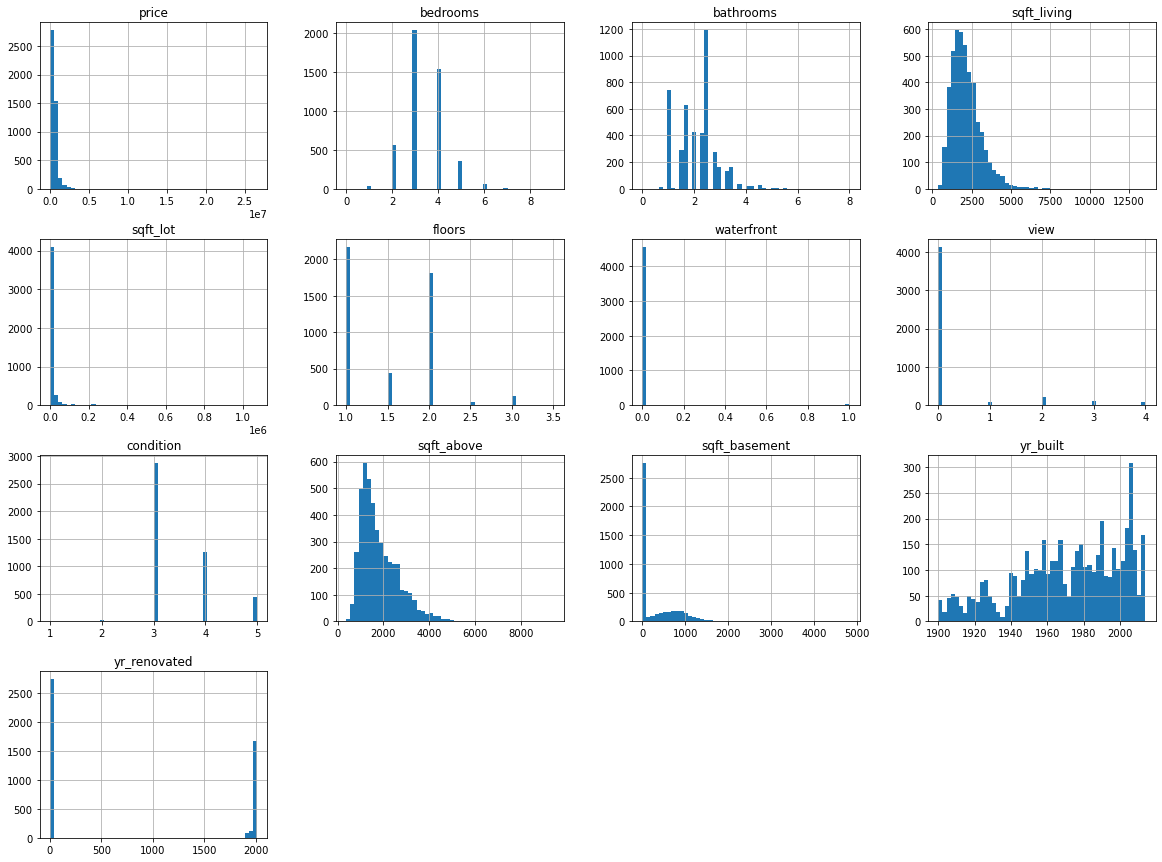

In [32]:
original.hist(bins=50, figsize=(20,15))
plt.show()

<b> Question 5: Notice that some of the instances have a value zero for the house price. write two functions one that computes the mean prince form the non zero instances. One thatr computes the median price for the non zero instances. Note that you should not use built in median and mean functions to do this, but should complete it yourself. You can, however, compare the result of your functions to the built in functions to verify your implementation</b>

In [104]:
priceList=[]
for item in original['price']:
    if(item!=0):
        priceList.append(item)
def MeanOfNonZeroHousePrice():    
    mean=sum(priceList)/len(priceList)
    return mean

def MedianOfNonZeroHousePrice():   
    sortedPriceList=sorted(priceList, key=float)
    n=len(sortedPriceList)
    if(n%2==0):
        return (sortedPriceList[int(n/2)]+sortedPriceList[int(n/2) + 1])/2
    else:
        return sortedPriceList[int(n/2) + 1]
    
print("Mean : ",MeanOfNonZeroHousePrice())
print("Median : ",MedianOfNonZeroHousePrice())

Mean :  557905.8991379443
Median :  465000.0


<b> Question 6 : Create 3 instances of the dataset:<br>
        1. that removes all instances of houses with price 0<br>
        2. that replaces the zero priced houses with the mean price value form the non zero priced  houses, using your mean
            value function above and<br>
        3. That replaces the zero priced houses with median price value from the non zero priced houses using your median
            function from above<br>
</b>

In [420]:
print("No of rows in Original before droppping : ",len(original))
print("No of rows in Original.price that have 0 : ",(original.price==0).sum())
zeroPriceRowsRemoved=original.drop(original.index[original['price'] == 0], axis=0)
print("No of rows in zeroPriceRowsRemoved after droppping : ",len(zeroPriceRowsRemoved))

No of rows in Original before droppping :  4600
No of rows in Original.price that have 0 :  49
No of rows in zeroPriceRowsRemoved after droppping :  4551


In [418]:
print("Mean : ",MeanOfNonZeroHousePrice())
print("Before replacing")
print("No of rows in Original.price that have 0 : ",(original.price==0).sum())
zeroPriceReplacedWithMean=original.copy()
print("No of rows in zeroPriceReplacedWithMean.price that have 0: ",(zeroPriceReplacedWithMean.price==0).sum())
print("No of rows in zeroPriceReplacedWithMean.price that have mean: ",(zeroPriceReplacedWithMean.price==MeanOfNonZeroHousePrice()).sum())
zeroPriceReplacedWithMean['price'] = zeroPriceReplacedWithMean['price'].replace([0],MeanOfNonZeroHousePrice(),inplace=False)
print("After replacing")
print("No of rows in zeroPriceReplacedWithMean.price that have 0: ",(zeroPriceReplacedWithMean.price==0).sum())
print("No of rows in zeroPriceReplacedWithMean.price that have mean: ",(zeroPriceReplacedWithMean.price==MeanOfNonZeroHousePrice()).sum())

Mean :  557905.8991379443
Before replacing
No of rows in Original.price that have 0 :  49
No of rows in zeroPriceReplacedWithMean.price that have 0:  49
No of rows in zeroPriceReplacedWithMean.price that have mean:  0
After replacing
No of rows in zeroPriceReplacedWithMean.price that have 0:  0
No of rows in zeroPriceReplacedWithMean.price that have mean:  49


In [419]:
print("Median : ",MedianOfNonZeroHousePrice())
print("Before replacing")
print("No of rows in Original.price that have 0 : ",(original.price==0).sum())
zeroPriceReplacedWithMedian=original.copy()
print("No of rows in zeroPriceReplacedWithMedian.price that have 0: ",(zeroPriceReplacedWithMedian.price==0).sum())
print("No of rows in zeroPriceReplacedWithMedian.price that have median: ",(zeroPriceReplacedWithMedian.price==MedianOfNonZeroHousePrice()).sum())
zeroPriceReplacedWithMedian['price'] = zeroPriceReplacedWithMedian['price'].replace([0],MedianOfNonZeroHousePrice(),inplace=False)
print("After replacing")
print("No of rows in zeroPriceReplacedWithMedian.price that have 0: ",(zeroPriceReplacedWithMedian.price==0).sum())
print("No of rows in zeroPriceReplacedWithMedian.price that have mean: ",(zeroPriceReplacedWithMedian.price==MedianOfNonZeroHousePrice()).sum())

Median :  465000.0
Before replacing
No of rows in Original.price that have 0 :  49
No of rows in zeroPriceReplacedWithMedian.price that have 0:  49
No of rows in zeroPriceReplacedWithMedian.price that have median:  17
After replacing
No of rows in zeroPriceReplacedWithMedian.price that have 0:  0
No of rows in zeroPriceReplacedWithMedian.price that have mean:  66


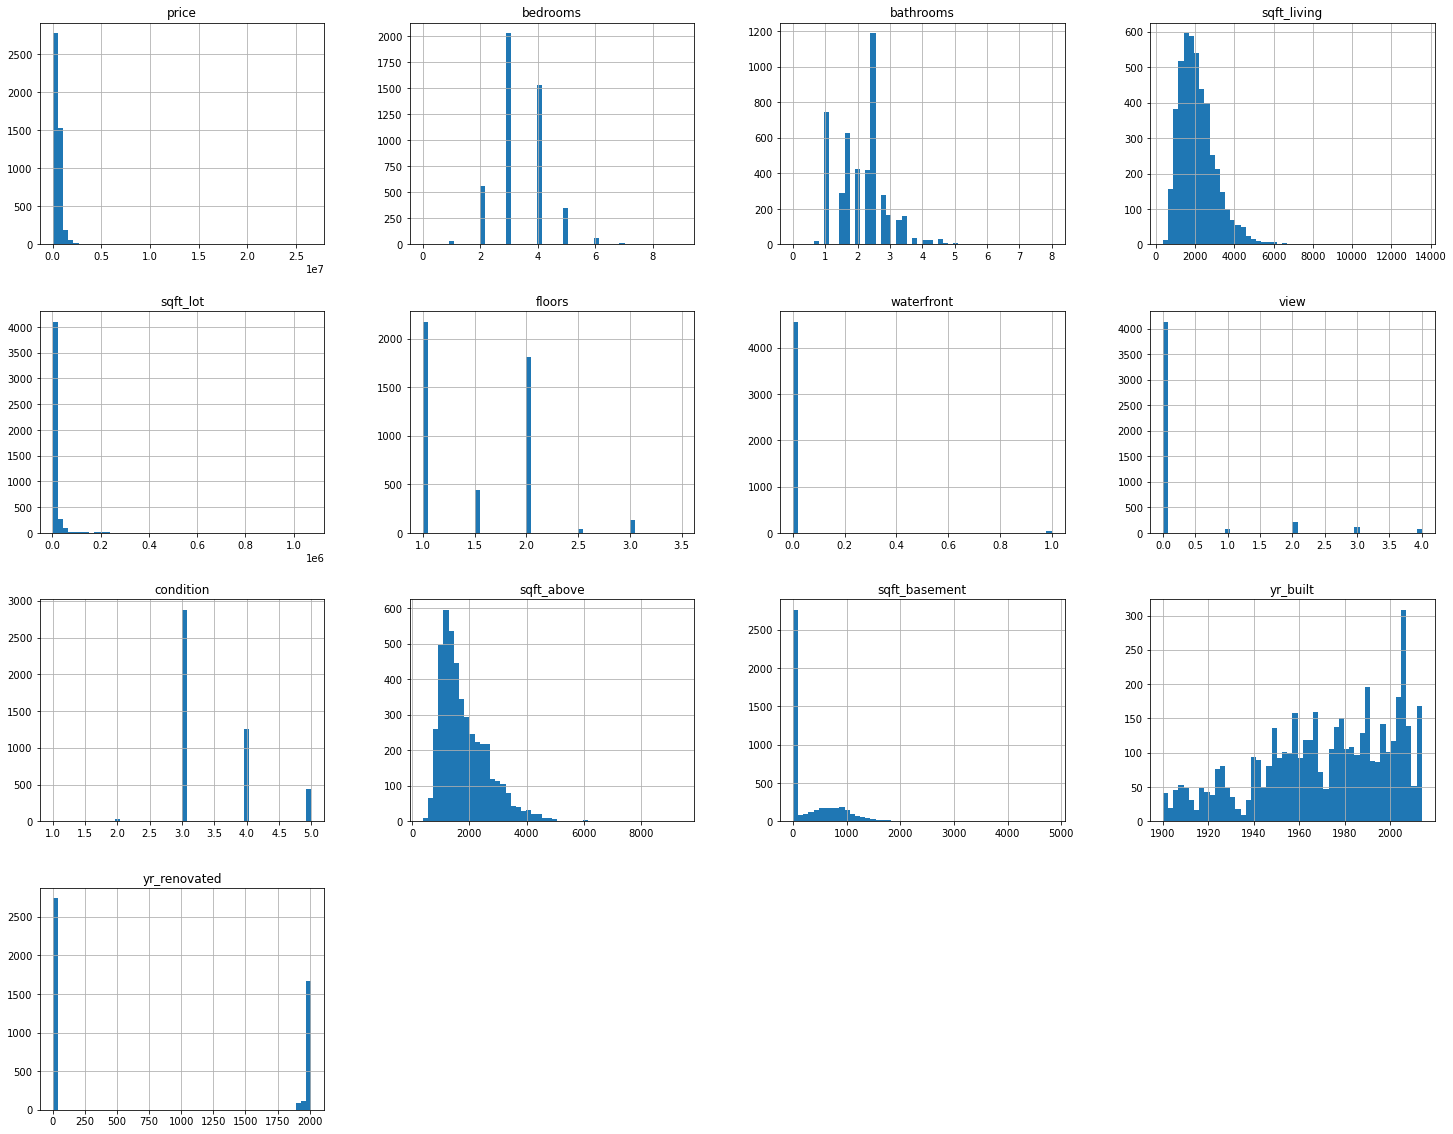

In [407]:
original.hist(bins=50, figsize=(25,20))
plt.show()

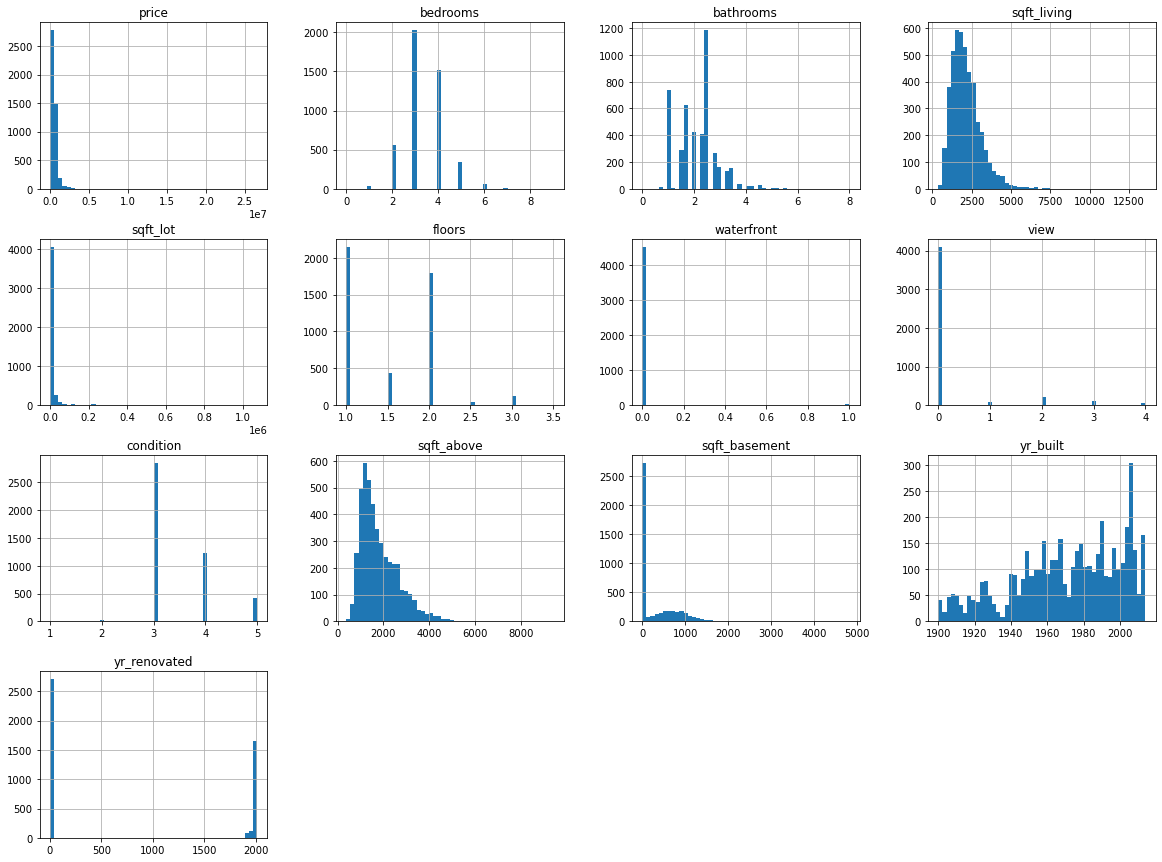

In [165]:
zeroPriceRowsRemoved .hist(bins=50, figsize=(20,15))
plt.show()

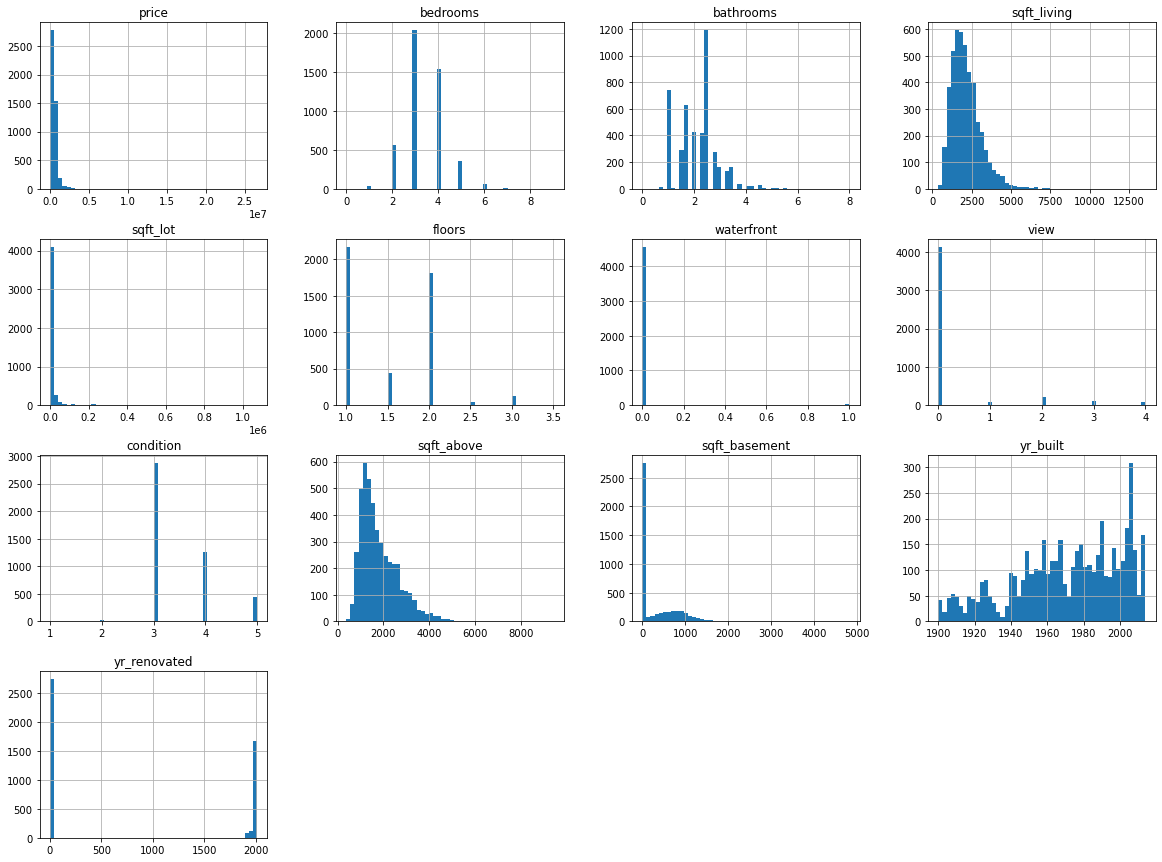

In [167]:
zeroPriceReplacedWithMean.hist(bins=50, figsize=(20,15))
plt.show()

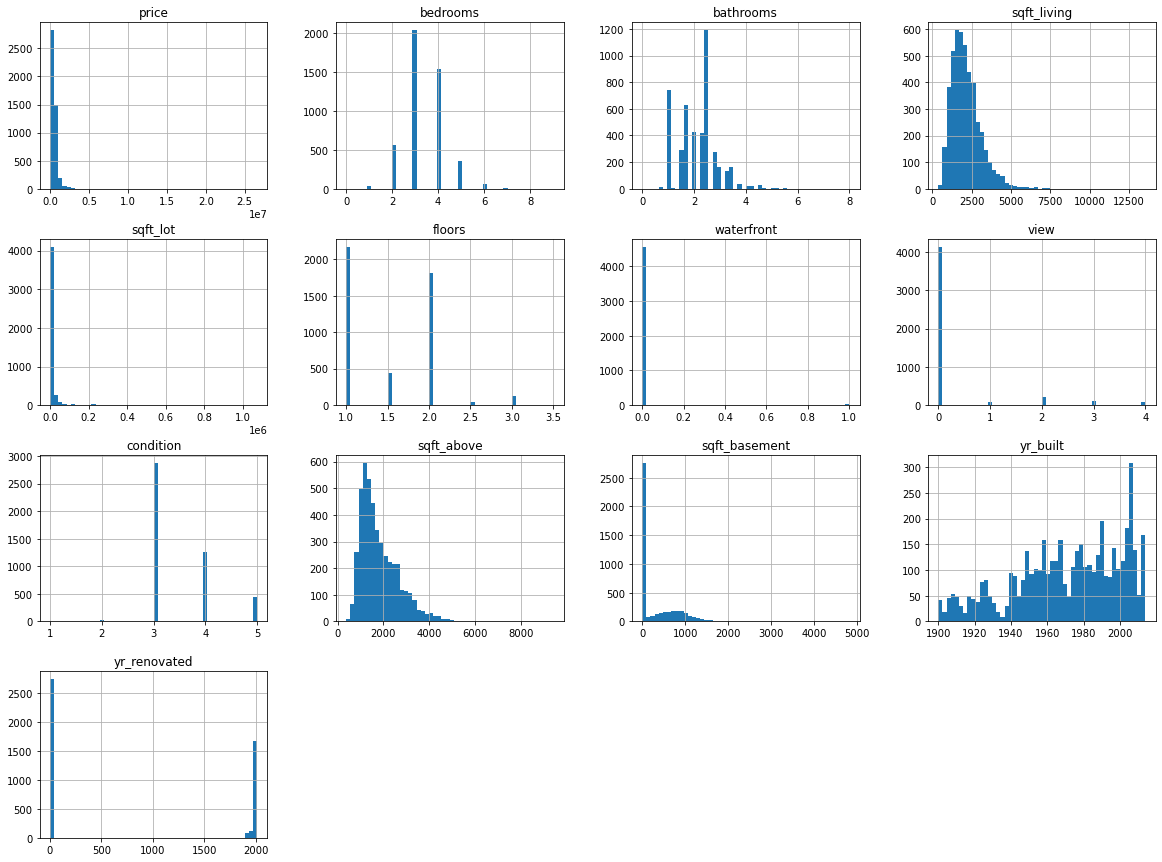

In [169]:
zeroPriceReplacedWithMedian.hist(bins=50, figsize=(20,15))
plt.show()

<b> Question 7 : For each of the above instances visialize the dependancy of the target on each continuous valued feature (eg 2D scatter plot). What features seem to be linearly correlated with target? what features do not have a correlation with target <br><br>
Usually, 0.5 is taken as the cut-off for the correlation between 2 features. But there are no features with correlation of 0.5 we consider 0.3 as the cut-off for linear correlation.sqft_living, sqft_above seem to have relatively high correlation with the target. sqft_basement,sqft_lot less correlation with the target, S0, they are not considered to be linearly correlated. sqft_lot has Bathrooms, Bedroooms, view, floore, waterfront, condition, yr_built, yr_renovated are discrete data, so they are not linearly correlated with the target.</b>

In [170]:
corr_matrix=original.corr()
corr_matrix["price"].sort_values(ascending=False)

price            1.000000
sqft_living      0.430410
sqft_above       0.367570
bathrooms        0.327110
view             0.228504
sqft_basement    0.210427
bedrooms         0.200336
floors           0.151461
waterfront       0.135648
sqft_lot         0.050451
condition        0.034915
yr_built         0.021857
yr_renovated    -0.028774
Name: price, dtype: float64

array([[<AxesSubplot:xlabel='price', ylabel='price'>,
        <AxesSubplot:xlabel='sqft_living', ylabel='price'>,
        <AxesSubplot:xlabel='sqft_above', ylabel='price'>,
        <AxesSubplot:xlabel='bathrooms', ylabel='price'>],
       [<AxesSubplot:xlabel='price', ylabel='sqft_living'>,
        <AxesSubplot:xlabel='sqft_living', ylabel='sqft_living'>,
        <AxesSubplot:xlabel='sqft_above', ylabel='sqft_living'>,
        <AxesSubplot:xlabel='bathrooms', ylabel='sqft_living'>],
       [<AxesSubplot:xlabel='price', ylabel='sqft_above'>,
        <AxesSubplot:xlabel='sqft_living', ylabel='sqft_above'>,
        <AxesSubplot:xlabel='sqft_above', ylabel='sqft_above'>,
        <AxesSubplot:xlabel='bathrooms', ylabel='sqft_above'>],
       [<AxesSubplot:xlabel='price', ylabel='bathrooms'>,
        <AxesSubplot:xlabel='sqft_living', ylabel='bathrooms'>,
        <AxesSubplot:xlabel='sqft_above', ylabel='bathrooms'>,
        <AxesSubplot:xlabel='bathrooms', ylabel='bathrooms'>]],
      dtype

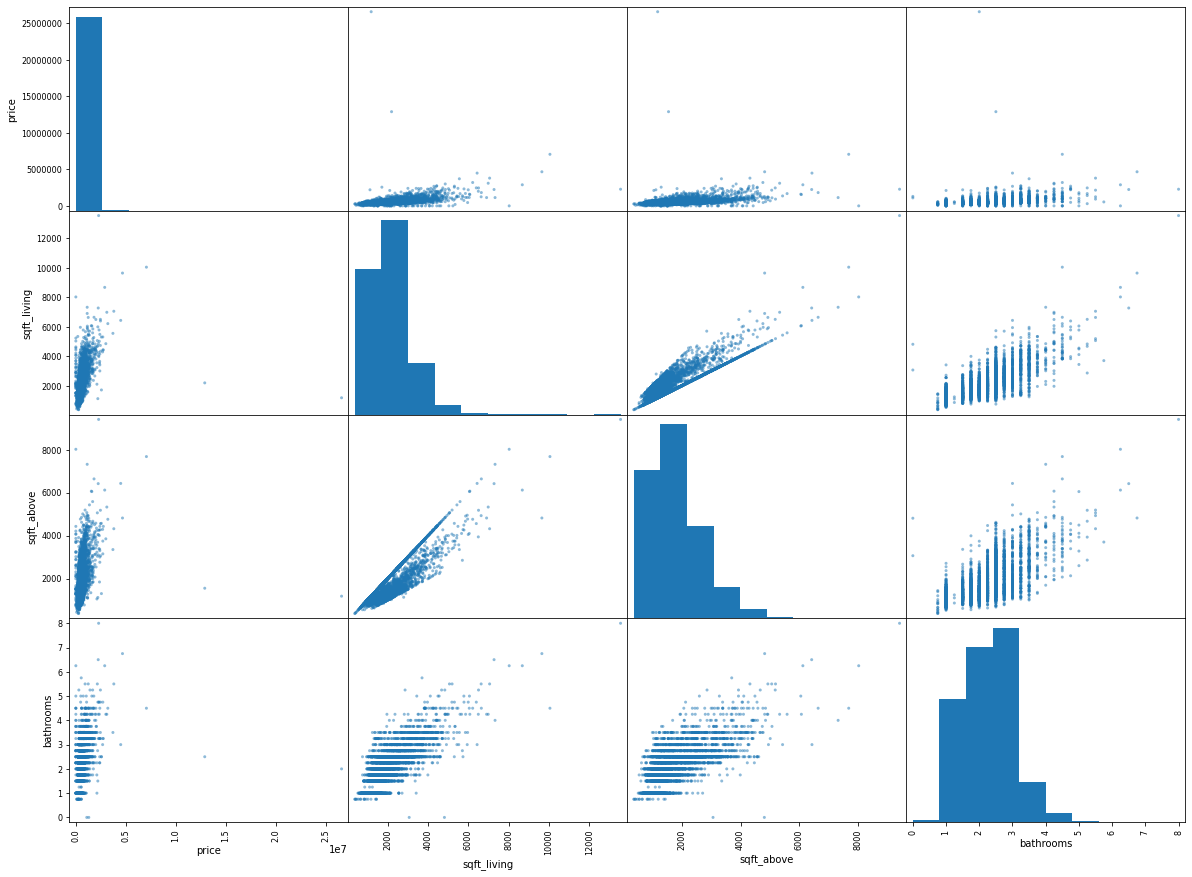

In [174]:
attributes=["price","sqft_living","sqft_above","bathrooms"]
scatter_matrix(original[attributes],figsize=(20,15))
# attributes=["price","view","sqft_basement","bedrooms"]
# attributes=["price","floors","waterfront","sqft_lot"]
# attributes=["price","condition","yr_built","yr_renovated"]


array([[<AxesSubplot:xlabel='price', ylabel='price'>,
        <AxesSubplot:xlabel='view', ylabel='price'>,
        <AxesSubplot:xlabel='sqft_basement', ylabel='price'>,
        <AxesSubplot:xlabel='bedrooms', ylabel='price'>],
       [<AxesSubplot:xlabel='price', ylabel='view'>,
        <AxesSubplot:xlabel='view', ylabel='view'>,
        <AxesSubplot:xlabel='sqft_basement', ylabel='view'>,
        <AxesSubplot:xlabel='bedrooms', ylabel='view'>],
       [<AxesSubplot:xlabel='price', ylabel='sqft_basement'>,
        <AxesSubplot:xlabel='view', ylabel='sqft_basement'>,
        <AxesSubplot:xlabel='sqft_basement', ylabel='sqft_basement'>,
        <AxesSubplot:xlabel='bedrooms', ylabel='sqft_basement'>],
       [<AxesSubplot:xlabel='price', ylabel='bedrooms'>,
        <AxesSubplot:xlabel='view', ylabel='bedrooms'>,
        <AxesSubplot:xlabel='sqft_basement', ylabel='bedrooms'>,
        <AxesSubplot:xlabel='bedrooms', ylabel='bedrooms'>]], dtype=object)

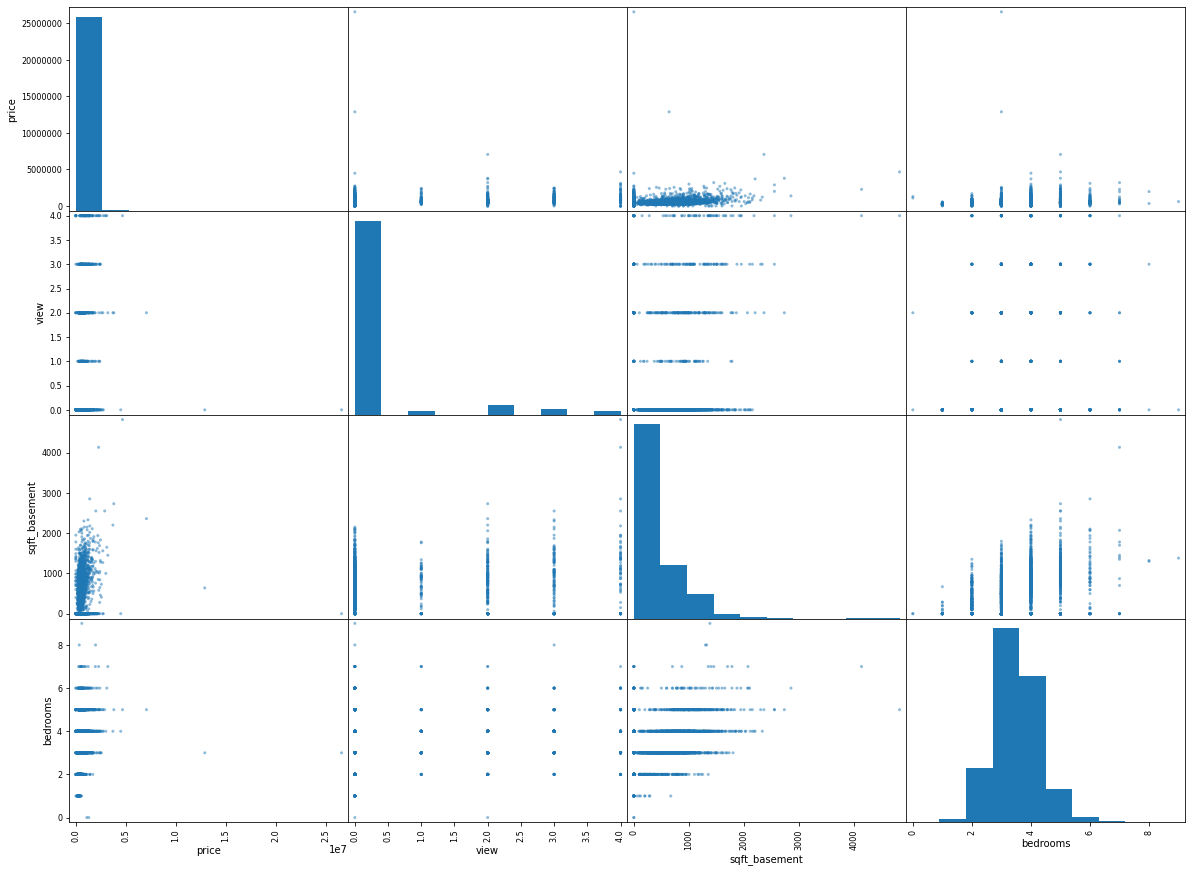

In [175]:
attributes=["price","view","sqft_basement","bedrooms"]
scatter_matrix(original[attributes],figsize=(20,15))

array([[<AxesSubplot:xlabel='price', ylabel='price'>,
        <AxesSubplot:xlabel='floors', ylabel='price'>,
        <AxesSubplot:xlabel='waterfront', ylabel='price'>,
        <AxesSubplot:xlabel='sqft_lot', ylabel='price'>],
       [<AxesSubplot:xlabel='price', ylabel='floors'>,
        <AxesSubplot:xlabel='floors', ylabel='floors'>,
        <AxesSubplot:xlabel='waterfront', ylabel='floors'>,
        <AxesSubplot:xlabel='sqft_lot', ylabel='floors'>],
       [<AxesSubplot:xlabel='price', ylabel='waterfront'>,
        <AxesSubplot:xlabel='floors', ylabel='waterfront'>,
        <AxesSubplot:xlabel='waterfront', ylabel='waterfront'>,
        <AxesSubplot:xlabel='sqft_lot', ylabel='waterfront'>],
       [<AxesSubplot:xlabel='price', ylabel='sqft_lot'>,
        <AxesSubplot:xlabel='floors', ylabel='sqft_lot'>,
        <AxesSubplot:xlabel='waterfront', ylabel='sqft_lot'>,
        <AxesSubplot:xlabel='sqft_lot', ylabel='sqft_lot'>]], dtype=object)

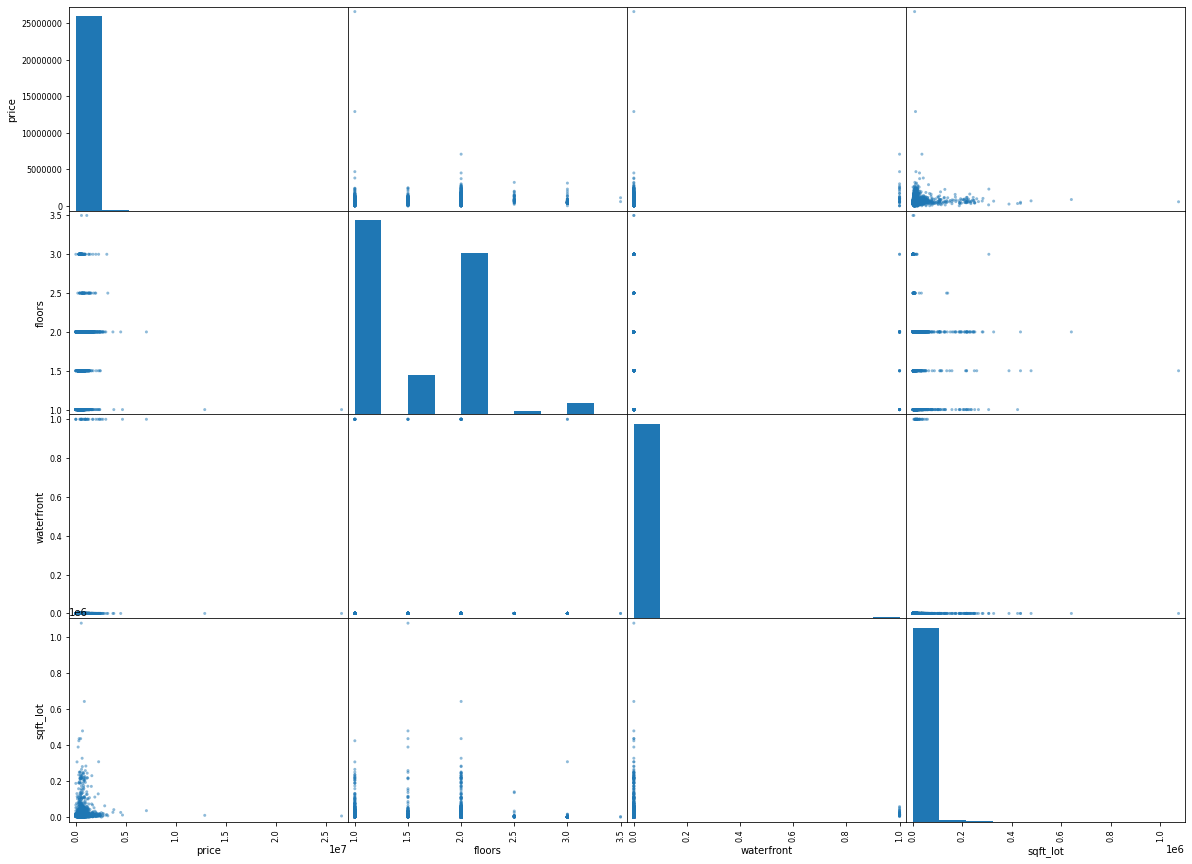

In [176]:
attributes=["price","floors","waterfront","sqft_lot"]
scatter_matrix(original[attributes],figsize=(20,15))

array([[<AxesSubplot:xlabel='price', ylabel='price'>,
        <AxesSubplot:xlabel='condition', ylabel='price'>,
        <AxesSubplot:xlabel='yr_built', ylabel='price'>,
        <AxesSubplot:xlabel='yr_renovated', ylabel='price'>],
       [<AxesSubplot:xlabel='price', ylabel='condition'>,
        <AxesSubplot:xlabel='condition', ylabel='condition'>,
        <AxesSubplot:xlabel='yr_built', ylabel='condition'>,
        <AxesSubplot:xlabel='yr_renovated', ylabel='condition'>],
       [<AxesSubplot:xlabel='price', ylabel='yr_built'>,
        <AxesSubplot:xlabel='condition', ylabel='yr_built'>,
        <AxesSubplot:xlabel='yr_built', ylabel='yr_built'>,
        <AxesSubplot:xlabel='yr_renovated', ylabel='yr_built'>],
       [<AxesSubplot:xlabel='price', ylabel='yr_renovated'>,
        <AxesSubplot:xlabel='condition', ylabel='yr_renovated'>,
        <AxesSubplot:xlabel='yr_built', ylabel='yr_renovated'>,
        <AxesSubplot:xlabel='yr_renovated', ylabel='yr_renovated'>]],
      dtype=object)

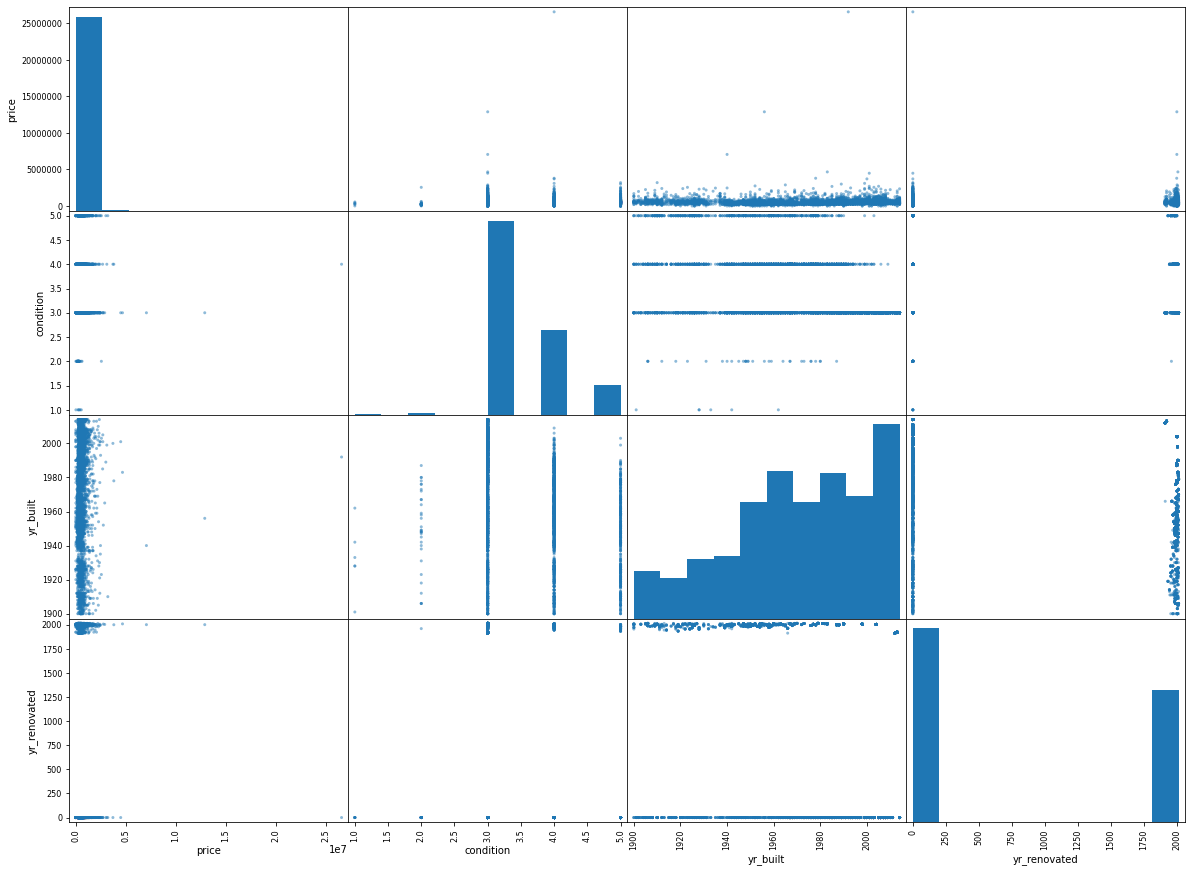

In [177]:
attributes=["price","condition","yr_built","yr_renovated"]
scatter_matrix(original[attributes],figsize=(20,15))

<b> Correlation-zeroPriceRowsRemoved </b>

In [178]:
corr_matrix=zeroPriceRowsRemoved.corr()
corr_matrix["price"].sort_values(ascending=False)

price            1.000000
sqft_living      0.445494
sqft_above       0.380661
bathrooms        0.341126
view             0.242587
sqft_basement    0.217782
bedrooms         0.210228
floors           0.152758
waterfront       0.150083
sqft_lot         0.051347
condition        0.038892
yr_built         0.021757
yr_renovated    -0.029034
Name: price, dtype: float64

array([[<AxesSubplot:xlabel='price', ylabel='price'>,
        <AxesSubplot:xlabel='sqft_living', ylabel='price'>,
        <AxesSubplot:xlabel='sqft_above', ylabel='price'>,
        <AxesSubplot:xlabel='bathrooms', ylabel='price'>],
       [<AxesSubplot:xlabel='price', ylabel='sqft_living'>,
        <AxesSubplot:xlabel='sqft_living', ylabel='sqft_living'>,
        <AxesSubplot:xlabel='sqft_above', ylabel='sqft_living'>,
        <AxesSubplot:xlabel='bathrooms', ylabel='sqft_living'>],
       [<AxesSubplot:xlabel='price', ylabel='sqft_above'>,
        <AxesSubplot:xlabel='sqft_living', ylabel='sqft_above'>,
        <AxesSubplot:xlabel='sqft_above', ylabel='sqft_above'>,
        <AxesSubplot:xlabel='bathrooms', ylabel='sqft_above'>],
       [<AxesSubplot:xlabel='price', ylabel='bathrooms'>,
        <AxesSubplot:xlabel='sqft_living', ylabel='bathrooms'>,
        <AxesSubplot:xlabel='sqft_above', ylabel='bathrooms'>,
        <AxesSubplot:xlabel='bathrooms', ylabel='bathrooms'>]],
      dtype

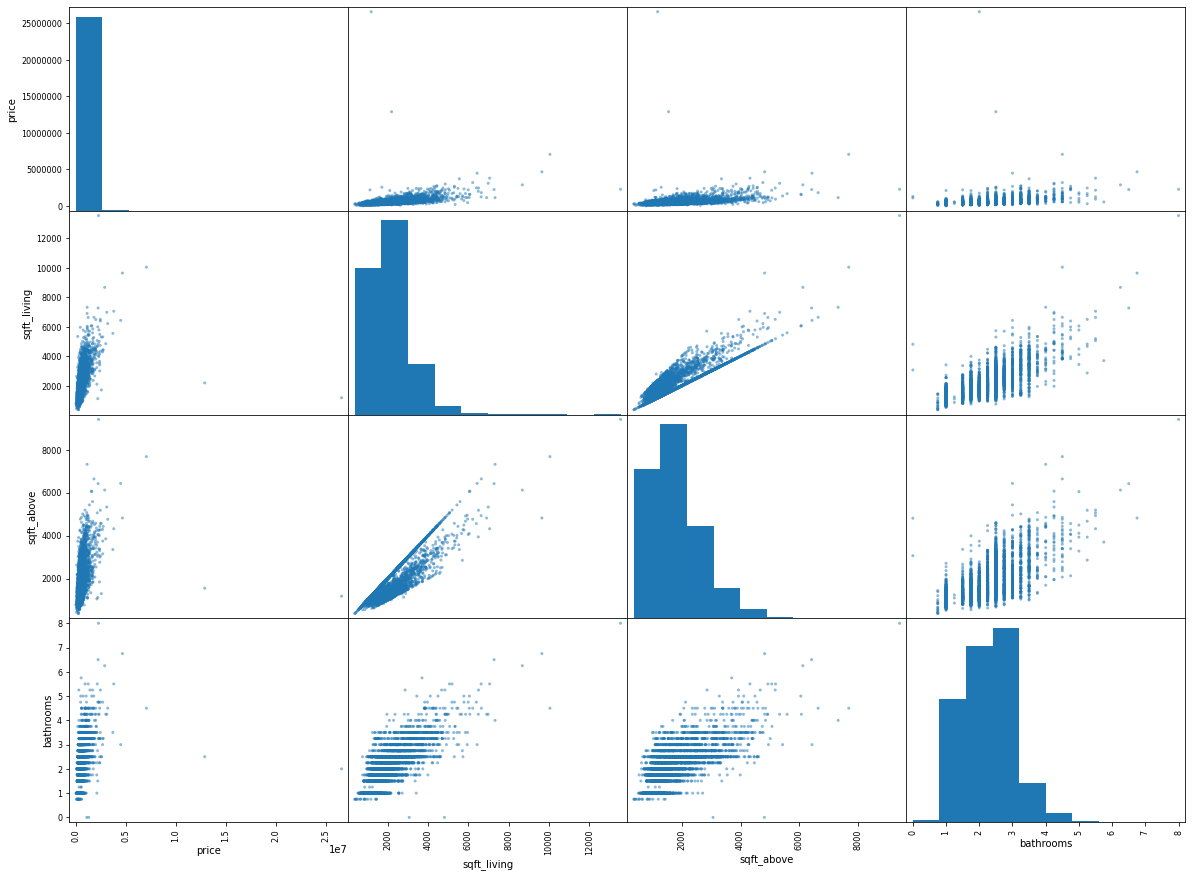

In [179]:
attributes=["price","sqft_living","sqft_above","bathrooms"]
scatter_matrix(zeroPriceRowsRemoved[attributes],figsize=(20,15))

array([[<AxesSubplot:xlabel='price', ylabel='price'>,
        <AxesSubplot:xlabel='view', ylabel='price'>,
        <AxesSubplot:xlabel='sqft_basement', ylabel='price'>,
        <AxesSubplot:xlabel='bedrooms', ylabel='price'>],
       [<AxesSubplot:xlabel='price', ylabel='view'>,
        <AxesSubplot:xlabel='view', ylabel='view'>,
        <AxesSubplot:xlabel='sqft_basement', ylabel='view'>,
        <AxesSubplot:xlabel='bedrooms', ylabel='view'>],
       [<AxesSubplot:xlabel='price', ylabel='sqft_basement'>,
        <AxesSubplot:xlabel='view', ylabel='sqft_basement'>,
        <AxesSubplot:xlabel='sqft_basement', ylabel='sqft_basement'>,
        <AxesSubplot:xlabel='bedrooms', ylabel='sqft_basement'>],
       [<AxesSubplot:xlabel='price', ylabel='bedrooms'>,
        <AxesSubplot:xlabel='view', ylabel='bedrooms'>,
        <AxesSubplot:xlabel='sqft_basement', ylabel='bedrooms'>,
        <AxesSubplot:xlabel='bedrooms', ylabel='bedrooms'>]], dtype=object)

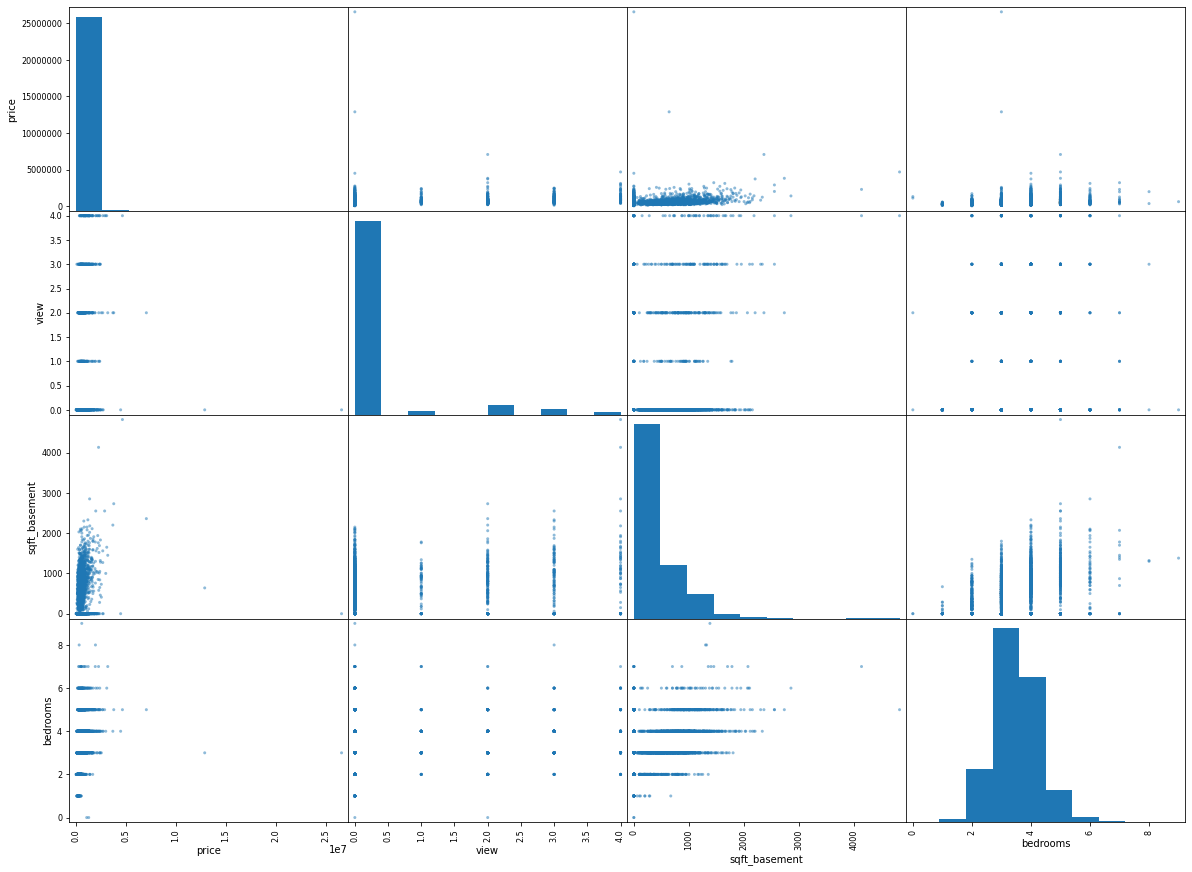

In [181]:
attributes=["price","view","sqft_basement","bedrooms"]
scatter_matrix(zeroPriceRowsRemoved[attributes],figsize=(20,15))

array([[<AxesSubplot:xlabel='price', ylabel='price'>,
        <AxesSubplot:xlabel='floors', ylabel='price'>,
        <AxesSubplot:xlabel='waterfront', ylabel='price'>,
        <AxesSubplot:xlabel='sqft_lot', ylabel='price'>],
       [<AxesSubplot:xlabel='price', ylabel='floors'>,
        <AxesSubplot:xlabel='floors', ylabel='floors'>,
        <AxesSubplot:xlabel='waterfront', ylabel='floors'>,
        <AxesSubplot:xlabel='sqft_lot', ylabel='floors'>],
       [<AxesSubplot:xlabel='price', ylabel='waterfront'>,
        <AxesSubplot:xlabel='floors', ylabel='waterfront'>,
        <AxesSubplot:xlabel='waterfront', ylabel='waterfront'>,
        <AxesSubplot:xlabel='sqft_lot', ylabel='waterfront'>],
       [<AxesSubplot:xlabel='price', ylabel='sqft_lot'>,
        <AxesSubplot:xlabel='floors', ylabel='sqft_lot'>,
        <AxesSubplot:xlabel='waterfront', ylabel='sqft_lot'>,
        <AxesSubplot:xlabel='sqft_lot', ylabel='sqft_lot'>]], dtype=object)

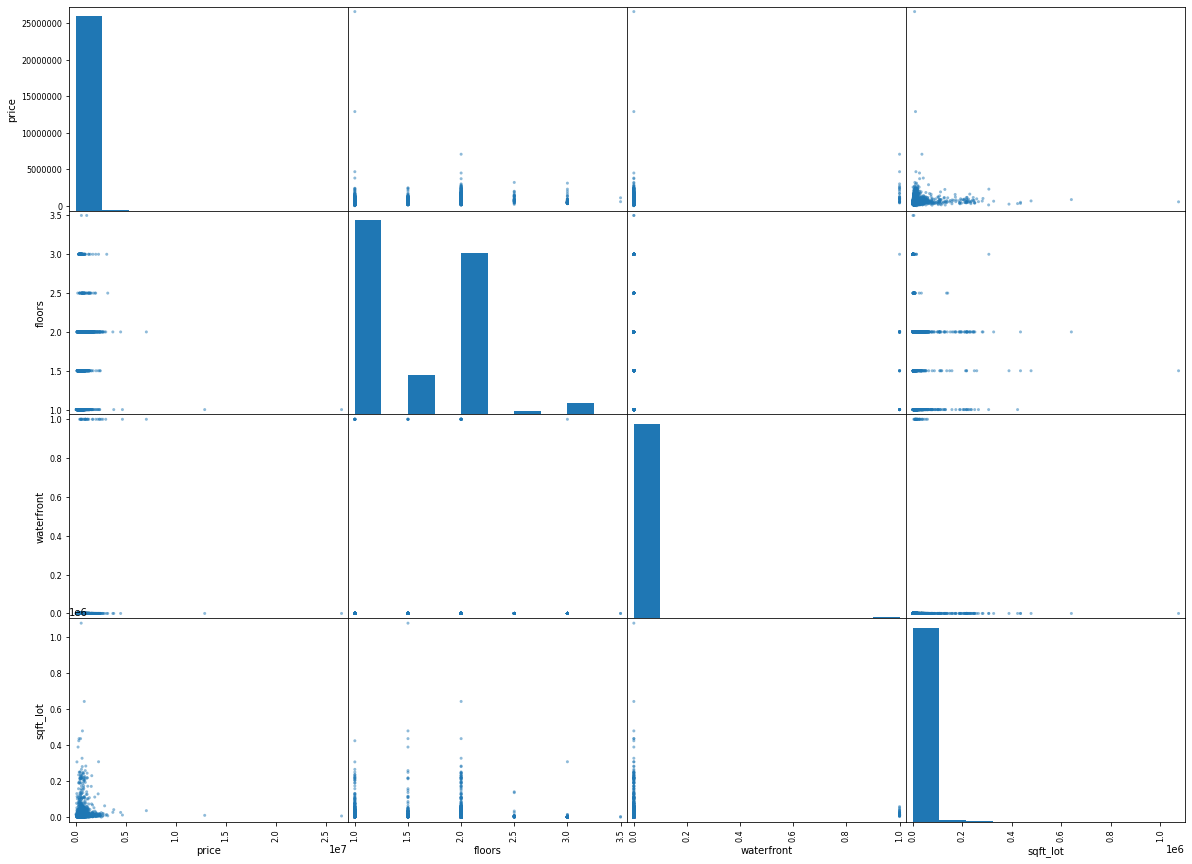

In [182]:
attributes=["price","floors","waterfront","sqft_lot"]
scatter_matrix(zeroPriceRowsRemoved[attributes],figsize=(20,15))

array([[<AxesSubplot:xlabel='price', ylabel='price'>,
        <AxesSubplot:xlabel='condition', ylabel='price'>,
        <AxesSubplot:xlabel='yr_built', ylabel='price'>,
        <AxesSubplot:xlabel='yr_renovated', ylabel='price'>],
       [<AxesSubplot:xlabel='price', ylabel='condition'>,
        <AxesSubplot:xlabel='condition', ylabel='condition'>,
        <AxesSubplot:xlabel='yr_built', ylabel='condition'>,
        <AxesSubplot:xlabel='yr_renovated', ylabel='condition'>],
       [<AxesSubplot:xlabel='price', ylabel='yr_built'>,
        <AxesSubplot:xlabel='condition', ylabel='yr_built'>,
        <AxesSubplot:xlabel='yr_built', ylabel='yr_built'>,
        <AxesSubplot:xlabel='yr_renovated', ylabel='yr_built'>],
       [<AxesSubplot:xlabel='price', ylabel='yr_renovated'>,
        <AxesSubplot:xlabel='condition', ylabel='yr_renovated'>,
        <AxesSubplot:xlabel='yr_built', ylabel='yr_renovated'>,
        <AxesSubplot:xlabel='yr_renovated', ylabel='yr_renovated'>]],
      dtype=object)

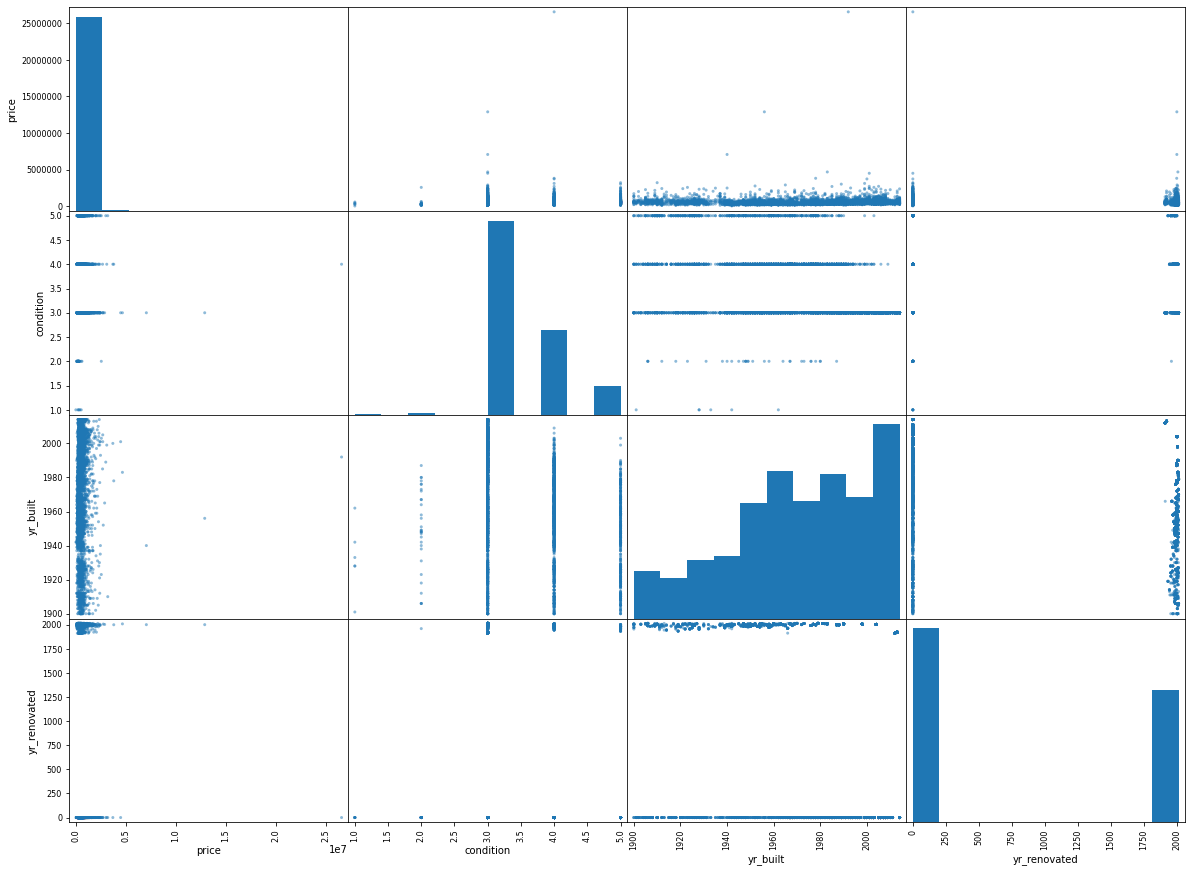

In [183]:
attributes=["price","condition","yr_built","yr_renovated"]
scatter_matrix(zeroPriceRowsRemoved[attributes],figsize=(20,15))

<b> Correlation-zeroPriceReplacedWithMean </b>

In [184]:
corr_matrix=zeroPriceReplacedWithMean.corr()
corr_matrix["price"].sort_values(ascending=False)

price            1.000000
sqft_living      0.439775
sqft_above       0.375239
bathrooms        0.336087
view             0.237252
sqft_basement    0.215616
bedrooms         0.208126
floors           0.152011
waterfront       0.143140
sqft_lot         0.051186
condition        0.038566
yr_built         0.021661
yr_renovated    -0.028879
Name: price, dtype: float64

array([[<AxesSubplot:xlabel='price', ylabel='price'>,
        <AxesSubplot:xlabel='sqft_living', ylabel='price'>,
        <AxesSubplot:xlabel='sqft_above', ylabel='price'>,
        <AxesSubplot:xlabel='bathrooms', ylabel='price'>],
       [<AxesSubplot:xlabel='price', ylabel='sqft_living'>,
        <AxesSubplot:xlabel='sqft_living', ylabel='sqft_living'>,
        <AxesSubplot:xlabel='sqft_above', ylabel='sqft_living'>,
        <AxesSubplot:xlabel='bathrooms', ylabel='sqft_living'>],
       [<AxesSubplot:xlabel='price', ylabel='sqft_above'>,
        <AxesSubplot:xlabel='sqft_living', ylabel='sqft_above'>,
        <AxesSubplot:xlabel='sqft_above', ylabel='sqft_above'>,
        <AxesSubplot:xlabel='bathrooms', ylabel='sqft_above'>],
       [<AxesSubplot:xlabel='price', ylabel='bathrooms'>,
        <AxesSubplot:xlabel='sqft_living', ylabel='bathrooms'>,
        <AxesSubplot:xlabel='sqft_above', ylabel='bathrooms'>,
        <AxesSubplot:xlabel='bathrooms', ylabel='bathrooms'>]],
      dtype

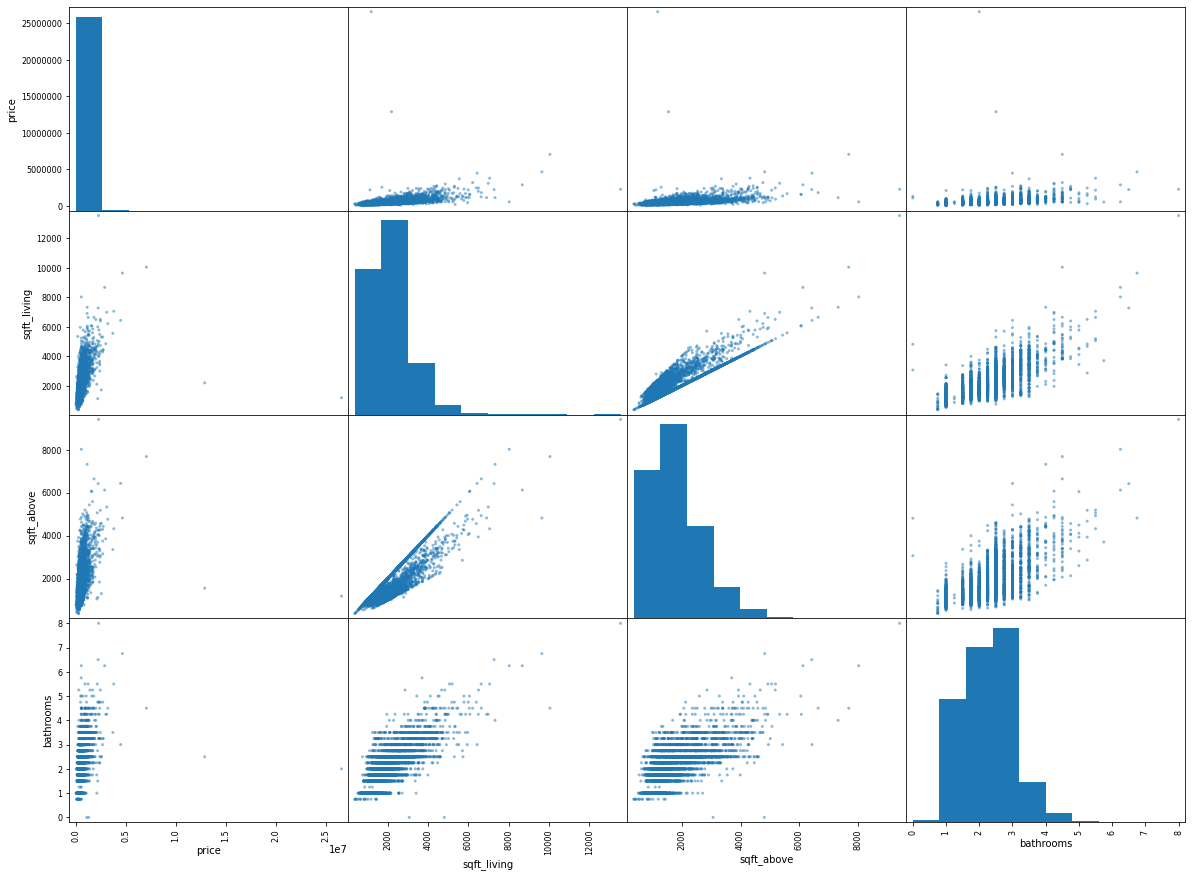

In [185]:
attributes=["price","sqft_living","sqft_above","bathrooms"]
scatter_matrix(zeroPriceReplacedWithMean[attributes],figsize=(20,15))

array([[<AxesSubplot:xlabel='price', ylabel='price'>,
        <AxesSubplot:xlabel='view', ylabel='price'>,
        <AxesSubplot:xlabel='sqft_basement', ylabel='price'>,
        <AxesSubplot:xlabel='bedrooms', ylabel='price'>],
       [<AxesSubplot:xlabel='price', ylabel='view'>,
        <AxesSubplot:xlabel='view', ylabel='view'>,
        <AxesSubplot:xlabel='sqft_basement', ylabel='view'>,
        <AxesSubplot:xlabel='bedrooms', ylabel='view'>],
       [<AxesSubplot:xlabel='price', ylabel='sqft_basement'>,
        <AxesSubplot:xlabel='view', ylabel='sqft_basement'>,
        <AxesSubplot:xlabel='sqft_basement', ylabel='sqft_basement'>,
        <AxesSubplot:xlabel='bedrooms', ylabel='sqft_basement'>],
       [<AxesSubplot:xlabel='price', ylabel='bedrooms'>,
        <AxesSubplot:xlabel='view', ylabel='bedrooms'>,
        <AxesSubplot:xlabel='sqft_basement', ylabel='bedrooms'>,
        <AxesSubplot:xlabel='bedrooms', ylabel='bedrooms'>]], dtype=object)

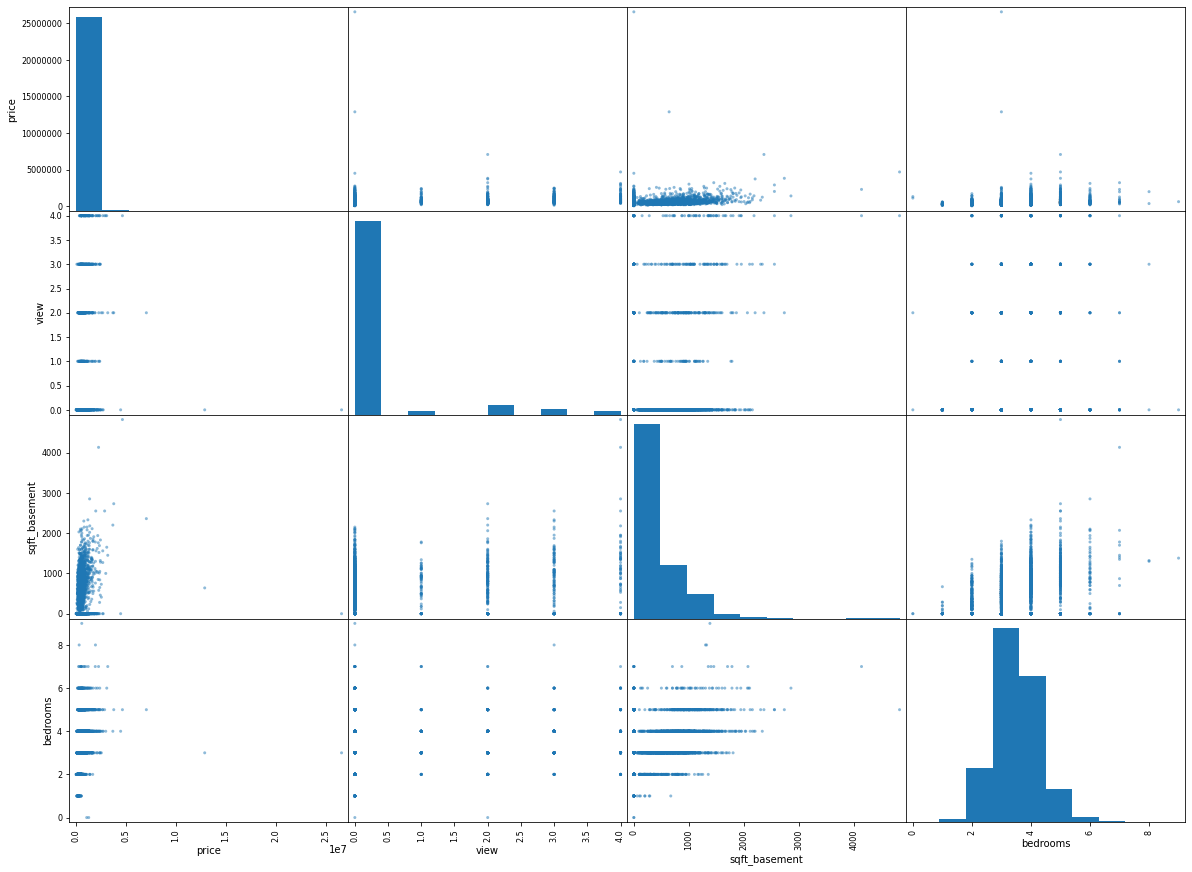

In [186]:
attributes=["price","view","sqft_basement","bedrooms"]
scatter_matrix(zeroPriceReplacedWithMean[attributes],figsize=(20,15))

array([[<AxesSubplot:xlabel='price', ylabel='price'>,
        <AxesSubplot:xlabel='floors', ylabel='price'>,
        <AxesSubplot:xlabel='waterfront', ylabel='price'>,
        <AxesSubplot:xlabel='sqft_lot', ylabel='price'>],
       [<AxesSubplot:xlabel='price', ylabel='floors'>,
        <AxesSubplot:xlabel='floors', ylabel='floors'>,
        <AxesSubplot:xlabel='waterfront', ylabel='floors'>,
        <AxesSubplot:xlabel='sqft_lot', ylabel='floors'>],
       [<AxesSubplot:xlabel='price', ylabel='waterfront'>,
        <AxesSubplot:xlabel='floors', ylabel='waterfront'>,
        <AxesSubplot:xlabel='waterfront', ylabel='waterfront'>,
        <AxesSubplot:xlabel='sqft_lot', ylabel='waterfront'>],
       [<AxesSubplot:xlabel='price', ylabel='sqft_lot'>,
        <AxesSubplot:xlabel='floors', ylabel='sqft_lot'>,
        <AxesSubplot:xlabel='waterfront', ylabel='sqft_lot'>,
        <AxesSubplot:xlabel='sqft_lot', ylabel='sqft_lot'>]], dtype=object)

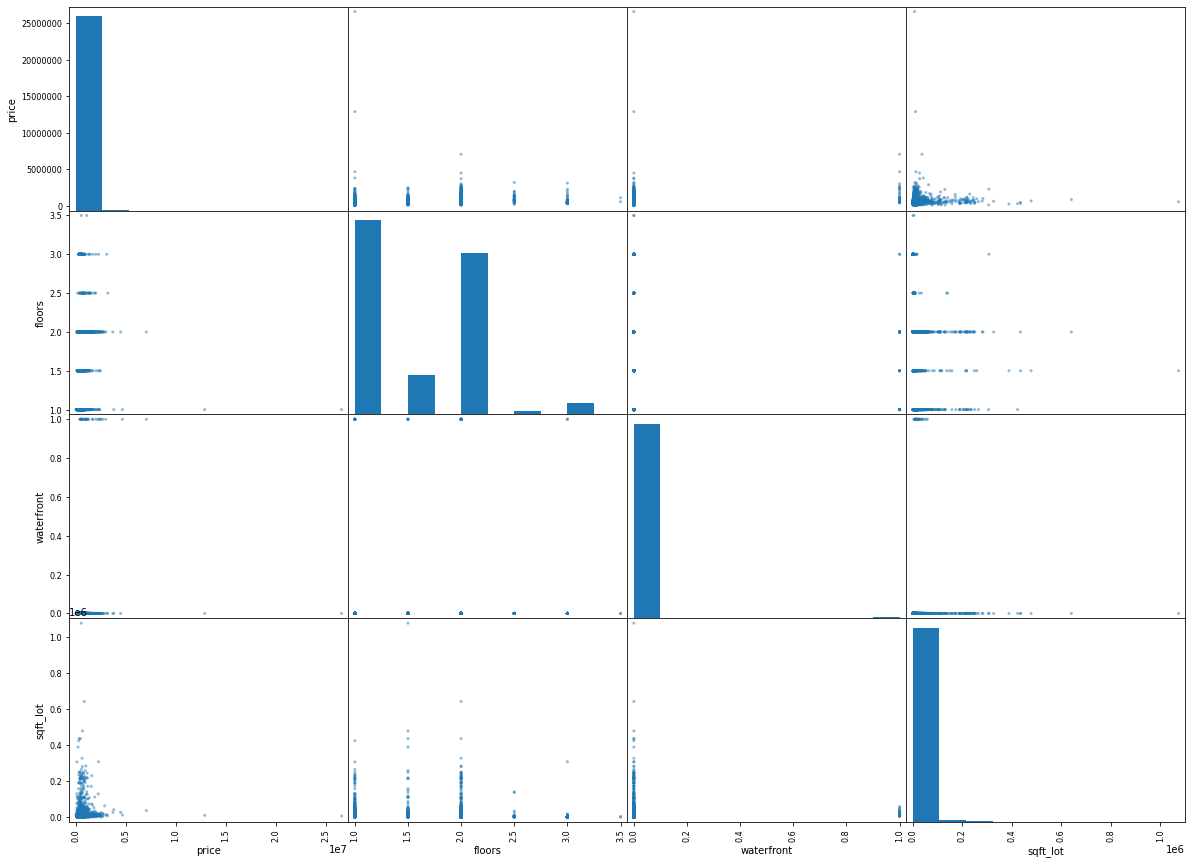

In [187]:
attributes=["price","floors","waterfront","sqft_lot"]
scatter_matrix(zeroPriceReplacedWithMean[attributes],figsize=(20,15))

array([[<AxesSubplot:xlabel='price', ylabel='price'>,
        <AxesSubplot:xlabel='floors', ylabel='price'>,
        <AxesSubplot:xlabel='waterfront', ylabel='price'>,
        <AxesSubplot:xlabel='sqft_lot', ylabel='price'>],
       [<AxesSubplot:xlabel='price', ylabel='floors'>,
        <AxesSubplot:xlabel='floors', ylabel='floors'>,
        <AxesSubplot:xlabel='waterfront', ylabel='floors'>,
        <AxesSubplot:xlabel='sqft_lot', ylabel='floors'>],
       [<AxesSubplot:xlabel='price', ylabel='waterfront'>,
        <AxesSubplot:xlabel='floors', ylabel='waterfront'>,
        <AxesSubplot:xlabel='waterfront', ylabel='waterfront'>,
        <AxesSubplot:xlabel='sqft_lot', ylabel='waterfront'>],
       [<AxesSubplot:xlabel='price', ylabel='sqft_lot'>,
        <AxesSubplot:xlabel='floors', ylabel='sqft_lot'>,
        <AxesSubplot:xlabel='waterfront', ylabel='sqft_lot'>,
        <AxesSubplot:xlabel='sqft_lot', ylabel='sqft_lot'>]], dtype=object)

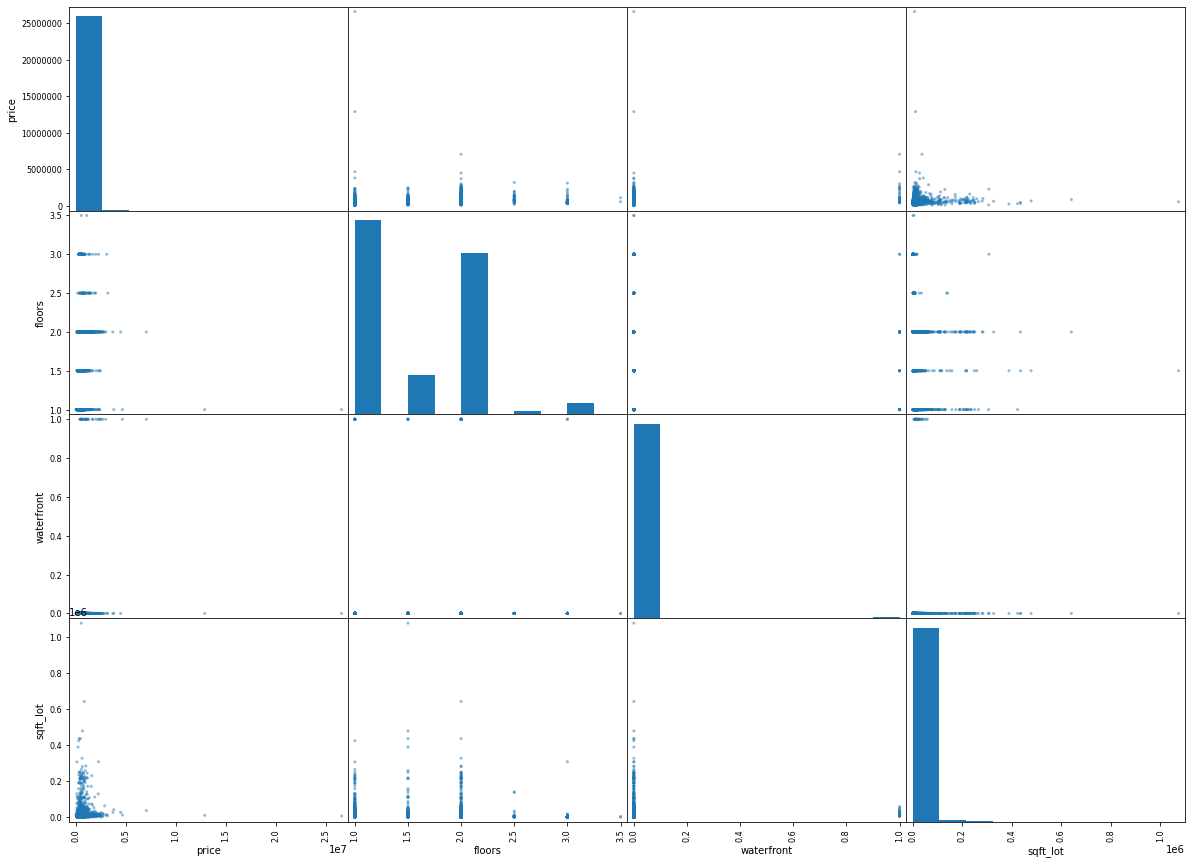

In [188]:
attributes=["price","floors","waterfront","sqft_lot"]
scatter_matrix(zeroPriceReplacedWithMean[attributes],figsize=(20,15))

<b> Correlation-zeroPriceReplacedWithMedian </b>

In [189]:
corr_matrix=zeroPriceReplacedWithMedian.corr()
corr_matrix["price"].sort_values(ascending=False)

price            1.000000
sqft_living      0.438525
sqft_above       0.374226
bathrooms        0.334827
view             0.235959
sqft_basement    0.214903
bedrooms         0.206972
floors           0.152029
waterfront       0.141989
sqft_lot         0.051100
condition        0.037982
yr_built         0.021710
yr_renovated    -0.028882
Name: price, dtype: float64

array([[<AxesSubplot:xlabel='price', ylabel='price'>,
        <AxesSubplot:xlabel='sqft_living', ylabel='price'>,
        <AxesSubplot:xlabel='sqft_above', ylabel='price'>,
        <AxesSubplot:xlabel='bathrooms', ylabel='price'>],
       [<AxesSubplot:xlabel='price', ylabel='sqft_living'>,
        <AxesSubplot:xlabel='sqft_living', ylabel='sqft_living'>,
        <AxesSubplot:xlabel='sqft_above', ylabel='sqft_living'>,
        <AxesSubplot:xlabel='bathrooms', ylabel='sqft_living'>],
       [<AxesSubplot:xlabel='price', ylabel='sqft_above'>,
        <AxesSubplot:xlabel='sqft_living', ylabel='sqft_above'>,
        <AxesSubplot:xlabel='sqft_above', ylabel='sqft_above'>,
        <AxesSubplot:xlabel='bathrooms', ylabel='sqft_above'>],
       [<AxesSubplot:xlabel='price', ylabel='bathrooms'>,
        <AxesSubplot:xlabel='sqft_living', ylabel='bathrooms'>,
        <AxesSubplot:xlabel='sqft_above', ylabel='bathrooms'>,
        <AxesSubplot:xlabel='bathrooms', ylabel='bathrooms'>]],
      dtype

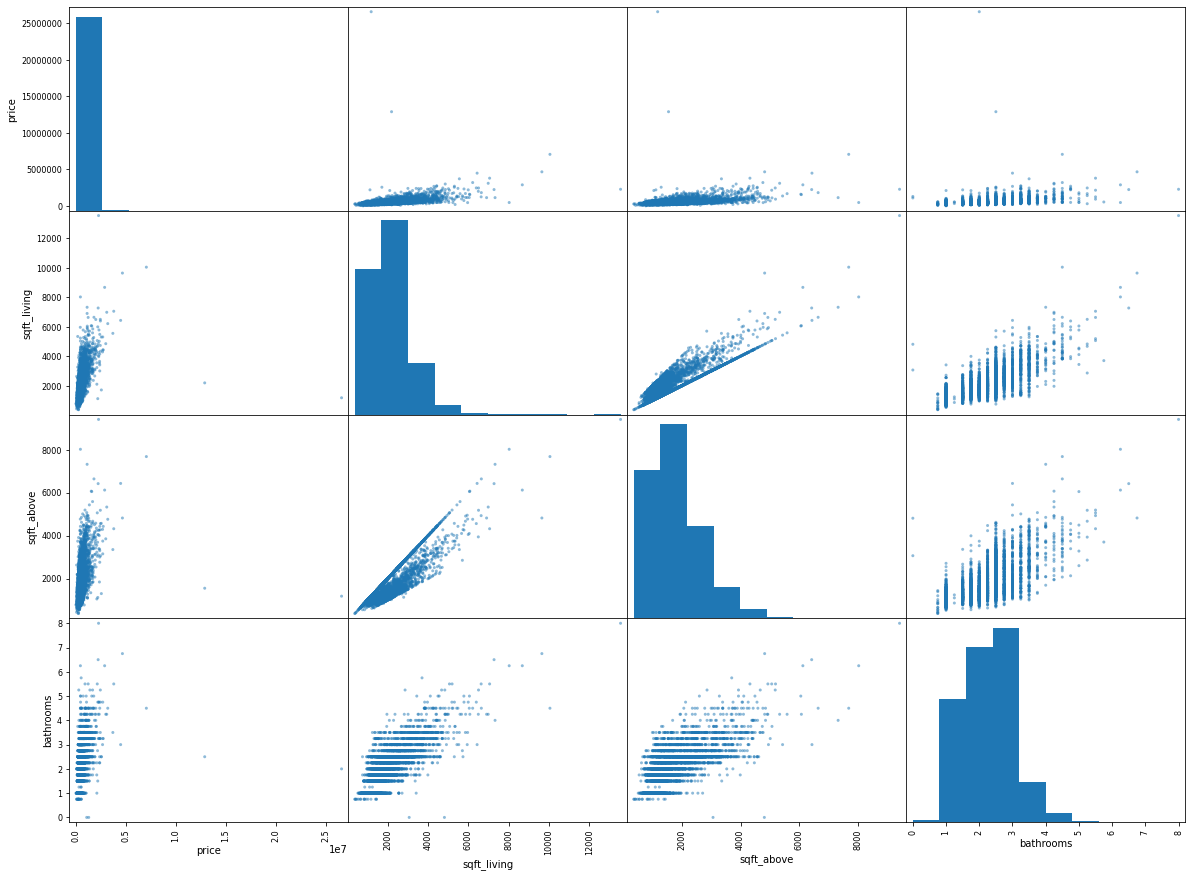

In [190]:
attributes=["price","sqft_living","sqft_above","bathrooms"]
scatter_matrix(zeroPriceReplacedWithMedian[attributes],figsize=(20,15))

array([[<AxesSubplot:xlabel='price', ylabel='price'>,
        <AxesSubplot:xlabel='view', ylabel='price'>,
        <AxesSubplot:xlabel='sqft_basement', ylabel='price'>,
        <AxesSubplot:xlabel='bedrooms', ylabel='price'>],
       [<AxesSubplot:xlabel='price', ylabel='view'>,
        <AxesSubplot:xlabel='view', ylabel='view'>,
        <AxesSubplot:xlabel='sqft_basement', ylabel='view'>,
        <AxesSubplot:xlabel='bedrooms', ylabel='view'>],
       [<AxesSubplot:xlabel='price', ylabel='sqft_basement'>,
        <AxesSubplot:xlabel='view', ylabel='sqft_basement'>,
        <AxesSubplot:xlabel='sqft_basement', ylabel='sqft_basement'>,
        <AxesSubplot:xlabel='bedrooms', ylabel='sqft_basement'>],
       [<AxesSubplot:xlabel='price', ylabel='bedrooms'>,
        <AxesSubplot:xlabel='view', ylabel='bedrooms'>,
        <AxesSubplot:xlabel='sqft_basement', ylabel='bedrooms'>,
        <AxesSubplot:xlabel='bedrooms', ylabel='bedrooms'>]], dtype=object)

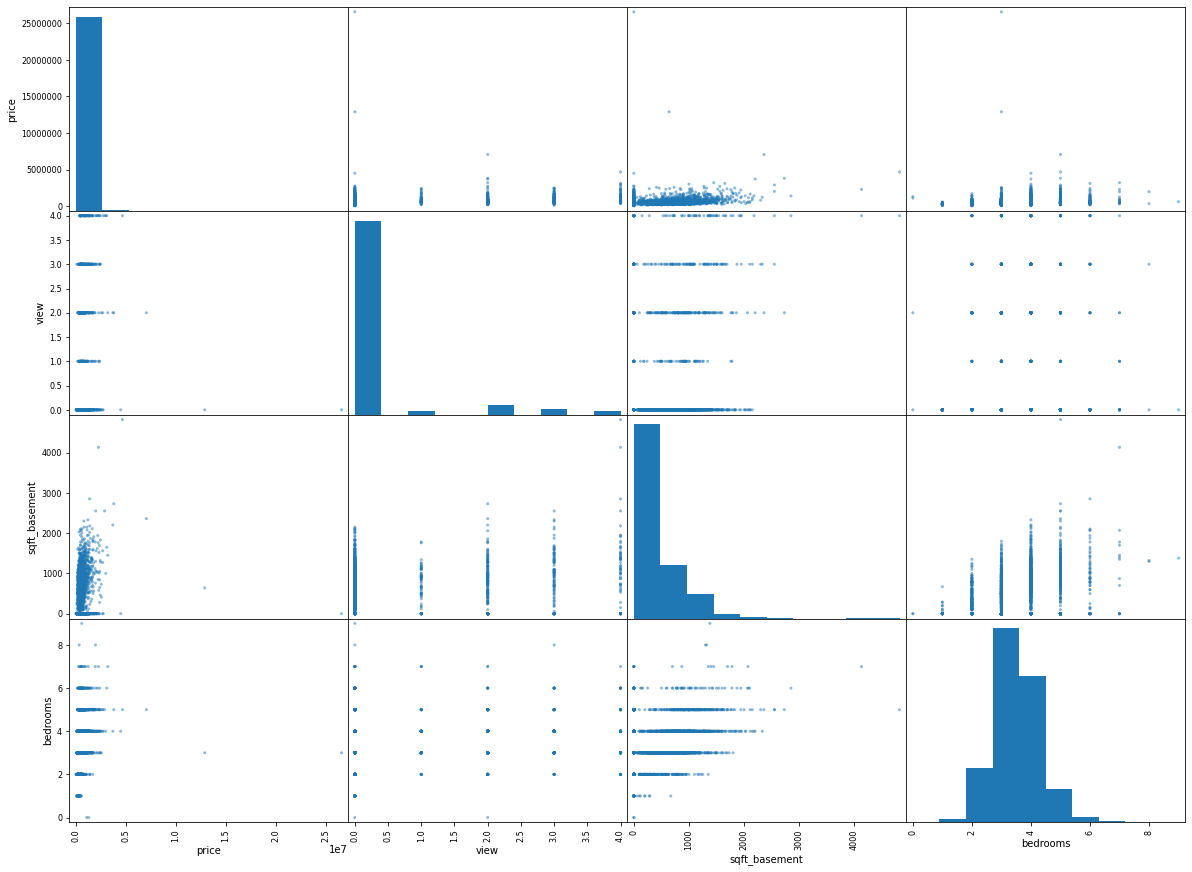

In [191]:
attributes=["price","view","sqft_basement","bedrooms"]
scatter_matrix(zeroPriceReplacedWithMedian[attributes],figsize=(20,15))

array([[<AxesSubplot:xlabel='price', ylabel='price'>,
        <AxesSubplot:xlabel='floors', ylabel='price'>,
        <AxesSubplot:xlabel='waterfront', ylabel='price'>,
        <AxesSubplot:xlabel='sqft_lot', ylabel='price'>],
       [<AxesSubplot:xlabel='price', ylabel='floors'>,
        <AxesSubplot:xlabel='floors', ylabel='floors'>,
        <AxesSubplot:xlabel='waterfront', ylabel='floors'>,
        <AxesSubplot:xlabel='sqft_lot', ylabel='floors'>],
       [<AxesSubplot:xlabel='price', ylabel='waterfront'>,
        <AxesSubplot:xlabel='floors', ylabel='waterfront'>,
        <AxesSubplot:xlabel='waterfront', ylabel='waterfront'>,
        <AxesSubplot:xlabel='sqft_lot', ylabel='waterfront'>],
       [<AxesSubplot:xlabel='price', ylabel='sqft_lot'>,
        <AxesSubplot:xlabel='floors', ylabel='sqft_lot'>,
        <AxesSubplot:xlabel='waterfront', ylabel='sqft_lot'>,
        <AxesSubplot:xlabel='sqft_lot', ylabel='sqft_lot'>]], dtype=object)

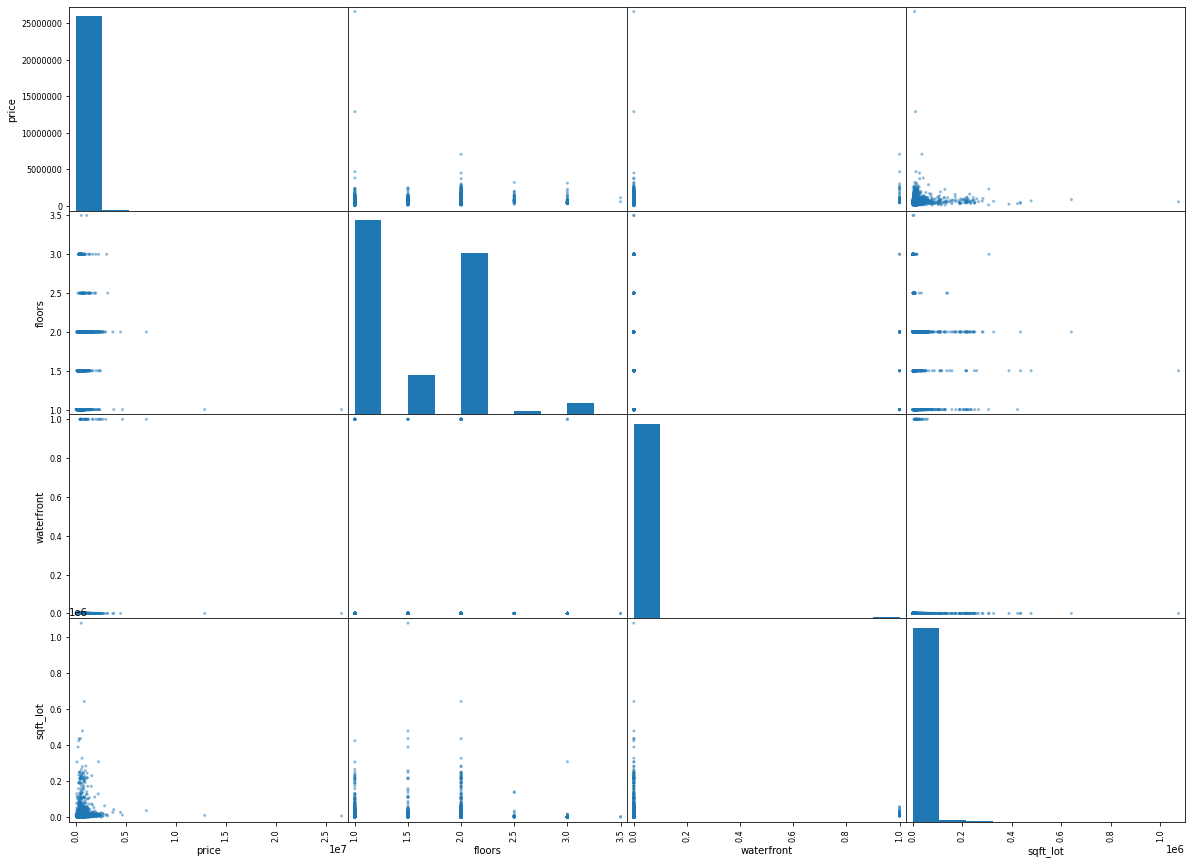

In [192]:
attributes=["price","floors","waterfront","sqft_lot"]
scatter_matrix(zeroPriceReplacedWithMedian[attributes],figsize=(20,15))

array([[<AxesSubplot:xlabel='price', ylabel='price'>,
        <AxesSubplot:xlabel='condition', ylabel='price'>,
        <AxesSubplot:xlabel='yr_built', ylabel='price'>,
        <AxesSubplot:xlabel='yr_renovated', ylabel='price'>],
       [<AxesSubplot:xlabel='price', ylabel='condition'>,
        <AxesSubplot:xlabel='condition', ylabel='condition'>,
        <AxesSubplot:xlabel='yr_built', ylabel='condition'>,
        <AxesSubplot:xlabel='yr_renovated', ylabel='condition'>],
       [<AxesSubplot:xlabel='price', ylabel='yr_built'>,
        <AxesSubplot:xlabel='condition', ylabel='yr_built'>,
        <AxesSubplot:xlabel='yr_built', ylabel='yr_built'>,
        <AxesSubplot:xlabel='yr_renovated', ylabel='yr_built'>],
       [<AxesSubplot:xlabel='price', ylabel='yr_renovated'>,
        <AxesSubplot:xlabel='condition', ylabel='yr_renovated'>,
        <AxesSubplot:xlabel='yr_built', ylabel='yr_renovated'>,
        <AxesSubplot:xlabel='yr_renovated', ylabel='yr_renovated'>]],
      dtype=object)

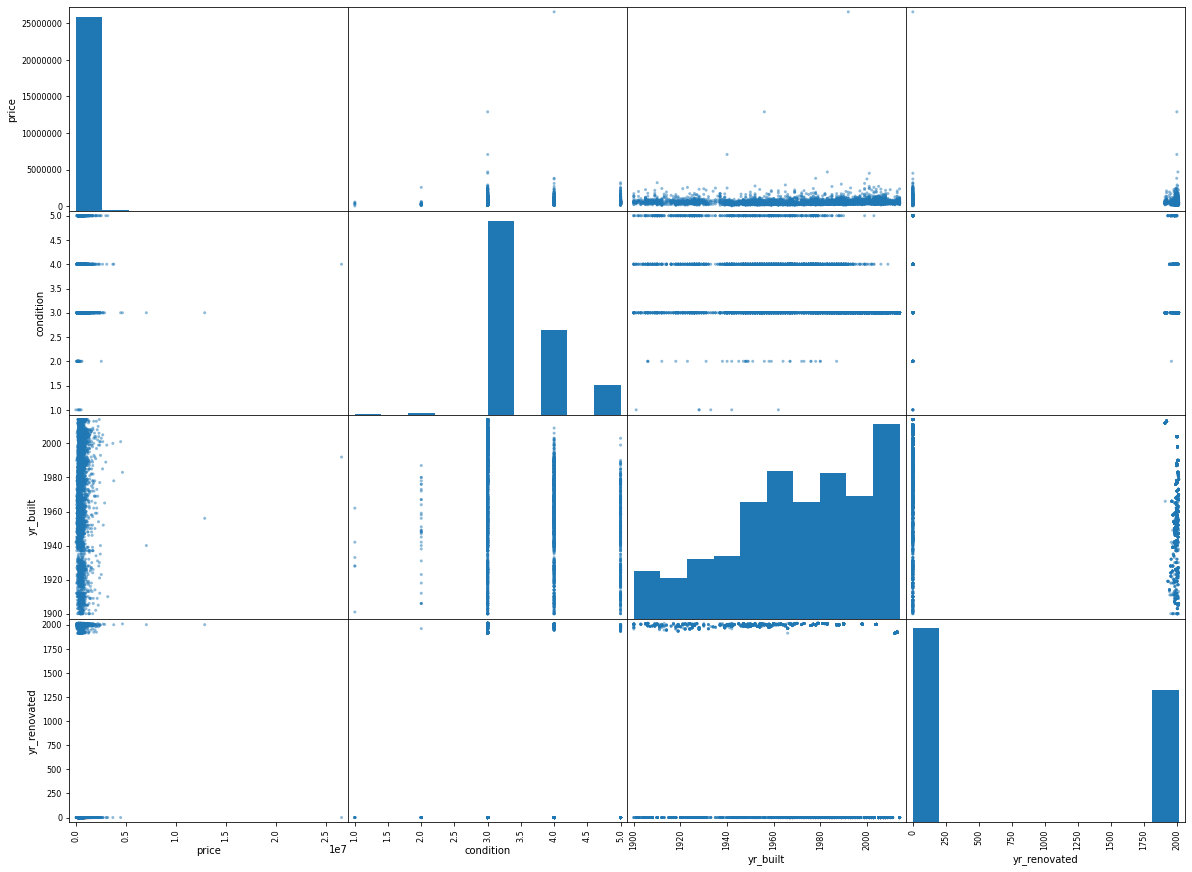

In [193]:
attributes=["price","condition","yr_built","yr_renovated"]
scatter_matrix(zeroPriceReplacedWithMedian[attributes],figsize=(20,15))

<b> Question 8: Write your own function that computes the correlation coefficients between the target and the continuous valued features. Do the resulting correlation agree with your visual inspection of linear correlation? Why/why not? How do the correlation coeffcicients differ for each set?<br><br>

As per the custom and python functions for calculating the correlation coefficicent with the pearson method, they do agree with visual representation. The numrical values above 0, and their respective 2D scatter plots do show the positive linear correlation accordingly.But lower the value of correlation coefficients harder it gets to discern the slightest correlation that the two attributes share. There is only one attribute that is inversely correlated with target variable that is the yr_renovated, due to its low value,the inverse relationship is not so evident from the scatter plot. <br><br>

Comparing the values of across the datasets, keeping aside the correlation coefficieents of attributes with target(price) in the original dataset, In the other we can observe that for the attributes the correlation coefficient with price decrease as we go from  0 price homes removed, 0  price homes replaced with mean and 0 price homes replaced with Median. We may interpret the attributes have the strongest correlation with price in the data set where the 0 prices homes are removed.    </b>

price            1.000000
sqft_living      0.430410
sqft_above       0.367570
bathrooms        0.327110
view             0.228504
sqft_basement    0.210427
bedrooms         0.200336
floors           0.151461
waterfront       0.135648
sqft_lot         0.050451
condition        0.034915
yr_built         0.021857
yr_renovated    -0.028774
Name: price, dtype: float64


price    1.000000
bedrooms    0.200336
bathrooms    0.327110
sqft_living    0.430410
sqft_lot    0.050451
floors    0.151461
sqft_above    0.367570
sqft_basement    0.210427
yr_built    0.021857
yr_renovated    -0.028774


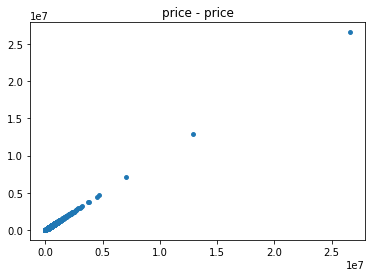

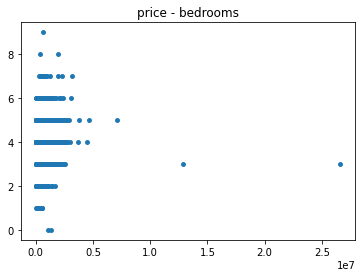

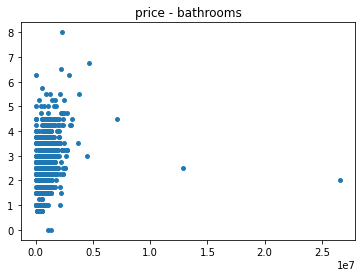

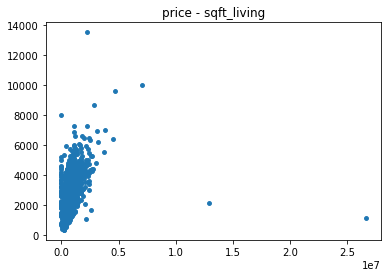

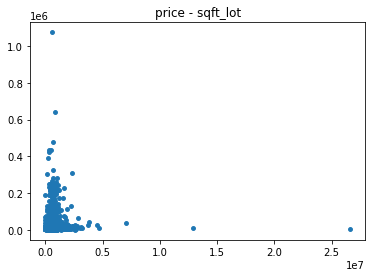

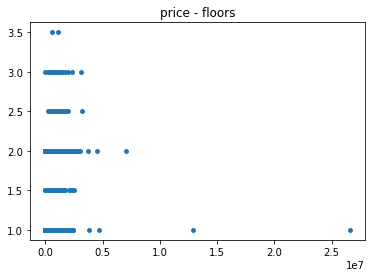

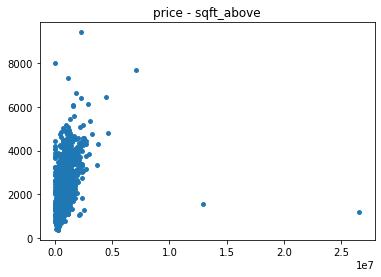

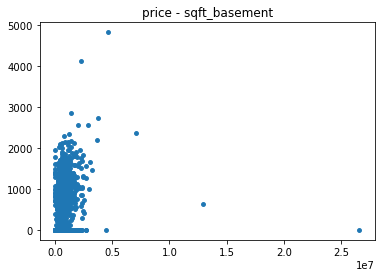

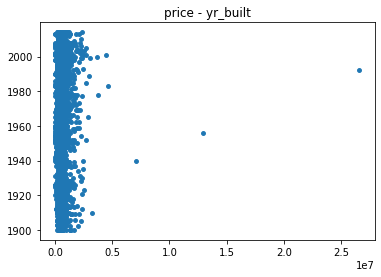

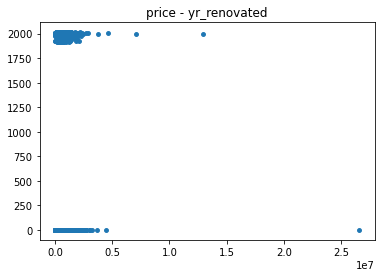

In [450]:
# def rank_calc(attributeList):
#     return list(attributeList.rank())

# def spearmans_corr(target_rank, attribute_rank, sample_size):
#     sq_sum=[]
#     for i in range(len(target_rank)):
#         d=target_rank[i]-attribute_rank[i]
#         sq_sum.append(d*d)

#     numerator=6*sum(sq_sum)
#     denominator=sample_size*((sample_size*sample_size)-1)
#     return (1-(numerator/denominator))
    
# print("original- corr coeff with Price")
# target_rank=rank_calc(original['price'])
# sample_size=len(original)
# coeff_list=[]
# for attribute in original_cont:
#     attribute_rank=rank_calc(original[attribute])
#     coeffcient=spearmans_corr(target_rank, attribute_rank, sample_size)
#     print(attribute," : ",'%.6f'%coeffcient)

# corr_matrix=original.corr(method='spearman')
# corr_matrix["price"].sort_values(ascending=False)
# #print(type(corr_matrix["price"]))

def calculate_mean(var):
    return sum(var)/len(var)

def correlation_cal(target,cont_val):
    cont_mean=calculate_mean(cont_val)
    tar_mean=calculate_mean(target)
    return sum((target-tar_mean)*(cont_val-cont_mean))/math.sqrt(sum((target-tar_mean)**2)*sum((cont_val-cont_mean)**2))

corr_matrix=original.corr(method='pearson')
print(corr_matrix["price"].sort_values(ascending=False))

r_org=[]
for i in continuous:
    r_org.append(correlation_cal(original["price"],original[i]))

print("\n")
index=0
for i in continuous:
    print(i,"  ",'%.6f'%r_org[index])
    index+=1
    
for i in continuous:
        plt.title('price - '+ i)
        plt.scatter(original["price"],original[i],s=15)
        plt.show()


price            1.000000
sqft_living      0.445494
sqft_above       0.380661
bathrooms        0.341126
view             0.242587
sqft_basement    0.217782
bedrooms         0.210228
floors           0.152758
waterfront       0.150083
sqft_lot         0.051347
condition        0.038892
yr_built         0.021757
yr_renovated    -0.029034
Name: price, dtype: float64


price    1.000000
bedrooms    0.210228
bathrooms    0.341126
sqft_living    0.445494
sqft_lot    0.051347
floors    0.152758
sqft_above    0.380661
sqft_basement    0.217782
yr_built    0.021757
yr_renovated    -0.029034


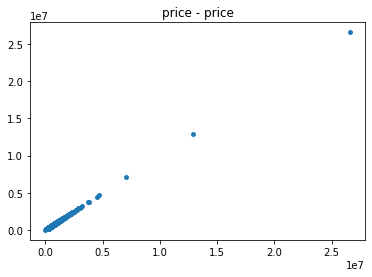

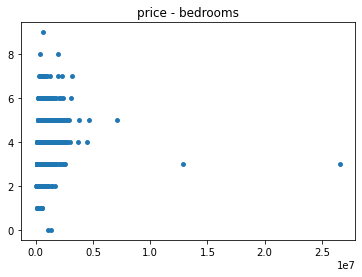

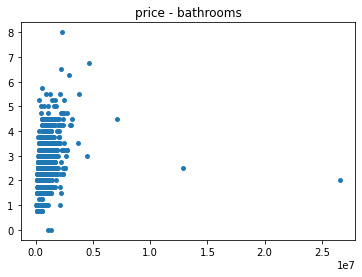

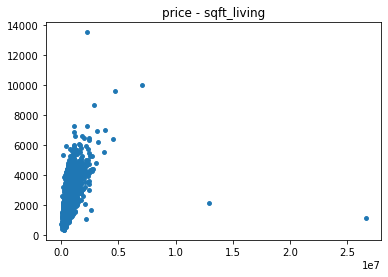

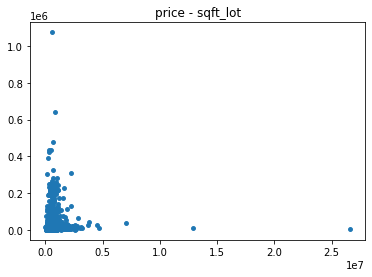

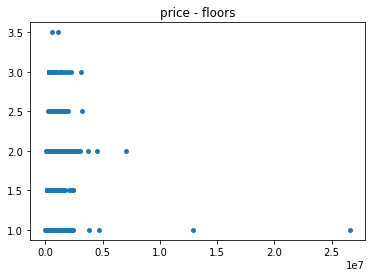

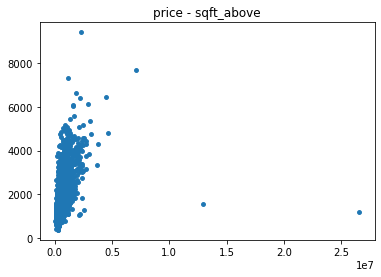

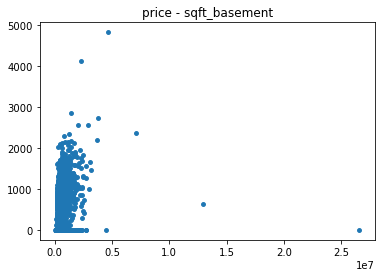

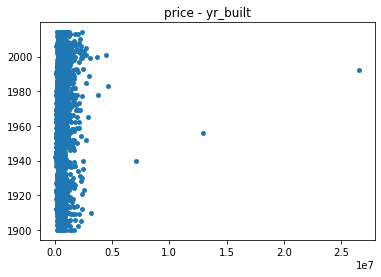

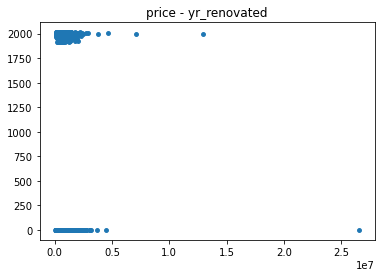

In [451]:
corr_matrix=zeroPriceRowsRemoved.corr(method='pearson')
print(corr_matrix["price"].sort_values(ascending=False))

r_org=[]
for i in continuous:
    r_org.append(correlation_cal(zeroPriceRowsRemoved["price"],zeroPriceRowsRemoved[i]))
    #r_org.append(correlation_cal(original["price"],original[i]))

print("\n")
index=0
for i in continuous:
    print(i,"  ",'%.6f'%r_org[index])
    #print()
    index+=1
    
for i in continuous:
        plt.title('price - '+ i)
        plt.scatter(zeroPriceRowsRemoved["price"],zeroPriceRowsRemoved[i],s=15)
        plt.show()

price            1.000000
sqft_living      0.439775
sqft_above       0.375239
bathrooms        0.336087
view             0.237252
sqft_basement    0.215616
bedrooms         0.208126
floors           0.152011
waterfront       0.143140
sqft_lot         0.051186
condition        0.038566
yr_built         0.021661
yr_renovated    -0.028879
Name: price, dtype: float64


price    1.000000
bedrooms    0.208126
bathrooms    0.336087
sqft_living    0.439775
sqft_lot    0.051186
floors    0.152011
sqft_above    0.375239
sqft_basement    0.215616
yr_built    0.021661
yr_renovated    -0.028879


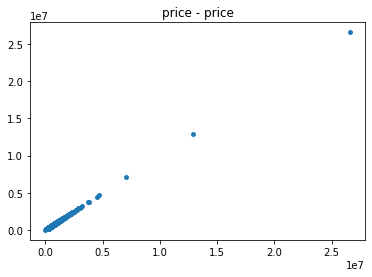

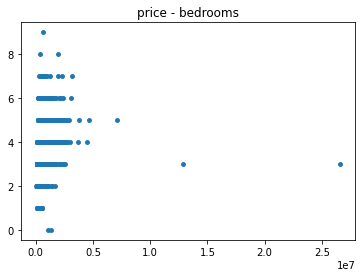

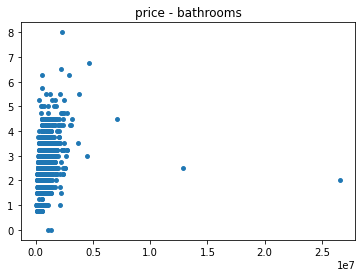

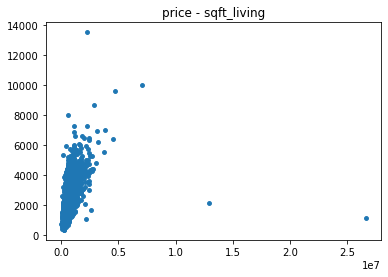

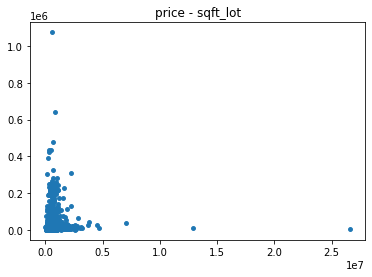

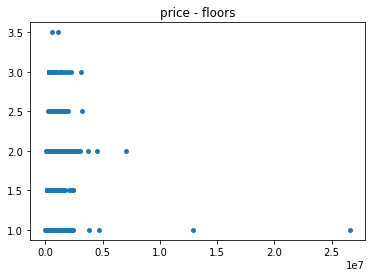

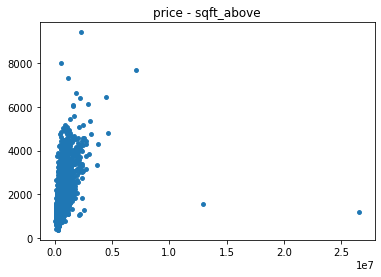

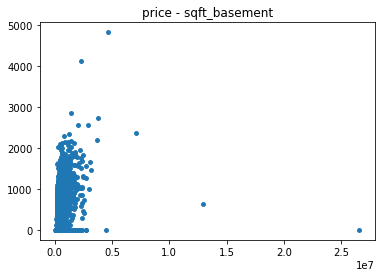

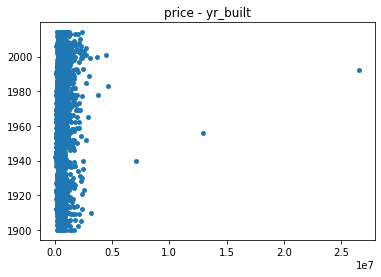

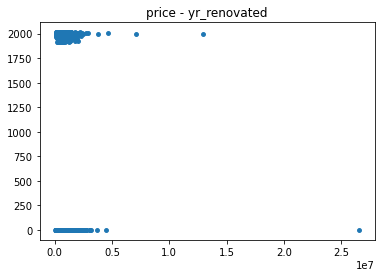

In [452]:
corr_matrix=zeroPriceReplacedWithMean.corr(method='pearson')
print(corr_matrix["price"].sort_values(ascending=False))

r_org=[]
for i in continuous:
    r_org.append(correlation_cal(zeroPriceReplacedWithMean["price"],zeroPriceReplacedWithMean[i]))
    #r_org.append(correlation_cal(original["price"],original[i]))

print("\n")
index=0
for i in continuous:
    print(i,"  ",'%.6f'%r_org[index])
    #print()
    index+=1
    
for i in continuous:
        plt.title('price - '+ i)
        plt.scatter(zeroPriceReplacedWithMean["price"],zeroPriceReplacedWithMean[i],s=15)
        plt.show()

price            1.000000
sqft_living      0.438525
sqft_above       0.374226
bathrooms        0.334827
view             0.235959
sqft_basement    0.214903
bedrooms         0.206972
floors           0.152029
waterfront       0.141989
sqft_lot         0.051100
condition        0.037982
yr_built         0.021710
yr_renovated    -0.028882
Name: price, dtype: float64


price    1.000000
bedrooms    0.206972
bathrooms    0.334827
sqft_living    0.438525
sqft_lot    0.051100
floors    0.152029
sqft_above    0.374226
sqft_basement    0.214903
yr_built    0.021710
yr_renovated    -0.028882


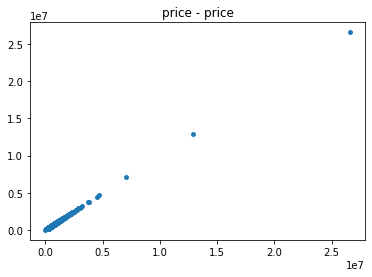

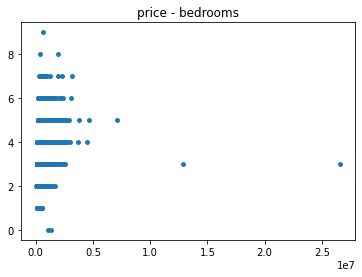

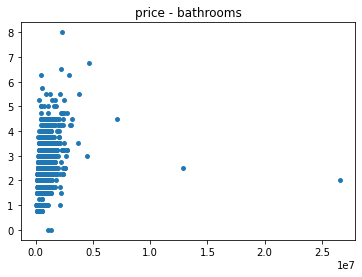

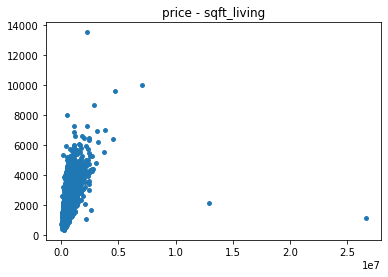

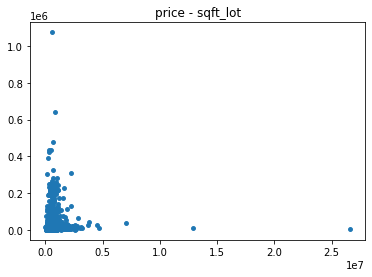

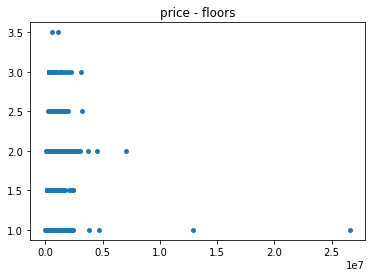

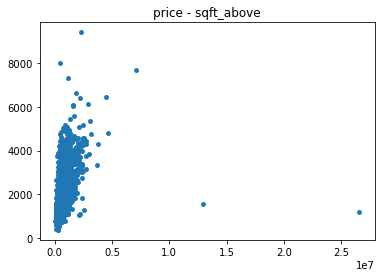

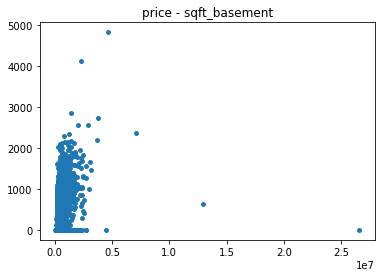

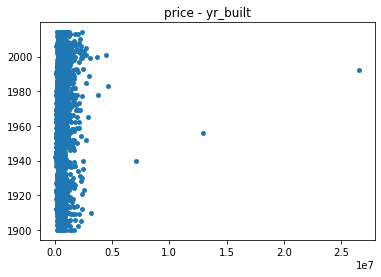

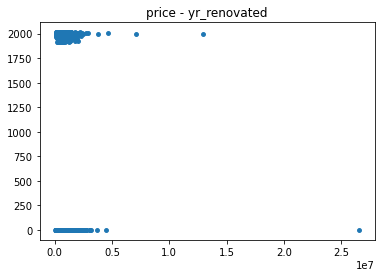

In [453]:
corr_matrix=zeroPriceReplacedWithMedian.corr(method='pearson')
print(corr_matrix["price"].sort_values(ascending=False))

r_org=[]
for i in continuous:
    r_org.append(correlation_cal(zeroPriceReplacedWithMedian["price"],zeroPriceReplacedWithMedian[i]))
    #r_org.append(correlation_cal(original["price"],original[i]))

print("\n")
index=0
for i in continuous:
    print(i,"  ",'%.6f'%r_org[index])
    #print()
    index+=1
    
for i in continuous:
        plt.title('price - '+ i)
        plt.scatter(zeroPriceReplacedWithMedian["price"],zeroPriceReplacedWithMedian[i],s=15)
        plt.show()

<b> Question 9 : Use One Hot Encoder in encode each variable that you dreem should be converted, for each data set(eg original $0 priced homes removed, medija replaced and mean replaced)<br>
For each variable you encode , provide a  rationale or justification for why it needs to be encoded. Also, provide a rationale for the viaribales that you choose not to encode<br><br>

Most of the machine learning algorithms can process only numerical data. the categorical attributes, for example date ,waterfront ,view ,condition ,street ,city ,statezip ,country, in order for this data to be readable by machine learning alogorithms, we have to convert them into numerical values.We could replace values for each category, we could do binary encoding(depending on the attribute) or we could use lable encoding etc. Here we have to decide the attributes best suited for one hot encoding. One hot encoding is best for those attributes that have type as 'object' and those that have minimum number of categories, as more the number of categories in the column, more will the volume of the dataset increase. In the attributes we have, by doing the value counts, we understand that the categories in the columns of object data type are a lot, and it is not wise to perform one hot encoding on them as they would increase our dataset dimension by significant amount. Since machine learning algorithms can process numerical data, it may not be necessary to perform one hot encoding on those numeric data columns that have less number of categories. Nevertheless, to understand the implementation of one hot encoding, we have demonstrated it on waterfront, view and condition.   
</b>

In [414]:
#print(original.columns)
#['date', 'street', 'city', 'statezip', 'country']
# print("date")
# original.date.value_counts()
# print("price")
# original.price.value_counts()
# print("Bedrooms")
# original.bedrooms.value_counts()
# print("Bathrooms")
# original.bathrooms.value_counts()
# print("sqft_living")
# original.sqft_living.value_counts()
# print("sqft_lot")
# original.sqft_lot.value_counts()
# print("floors")
# original.floors.value_counts()
# print("waterfront")
# original.waterfront.value_counts()
# print("view")
# original.view.value_counts()
# print("condition")
# original.condition.value_counts()
# print("sqft_above")
# original.sqft_above.value_counts()
# print("sqft_basement")
# original.sqft_basement.value_counts()
# print("yr_built")
# original.yr_built.value_counts()
# print("yr_renovated")
# original.yr_renovated.value_counts()
# print("street")
# original.street.value_counts()
# print("city")
# original.city.value_counts()
# print("statezip")
# original.statezip.value_counts()
# print("country")
# original.country.value_counts()

from sklearn.preprocessing import OneHotEncoder
one_hot_encoder=OneHotEncoder(sparse=False)

category=[["waterfront"],["view"],["condition"]]
def one_hot_encoding(dataframe):
    one_hot_encoded_var=[]
    for i in category:
        one_hot_encoded_var.append(one_hot_encoder.fit_transform(dataframe[i])) 
    for i in range(len(one_hot_encoded_var)):
        dataframe["OHE_"+category[i][0]]=one_hot_encoded_var[i].tolist()
    return dataframe

OHE_original=original.copy()
OHE_original=one_hot_encoding(OHE_original)
print(OHE_original)



                     date         price  bedrooms  bathrooms  sqft_living  \
0     2014-05-02 00:00:00  3.130000e+05       3.0       1.50         1340   
1     2014-05-02 00:00:00  2.384000e+06       5.0       2.50         3650   
2     2014-05-02 00:00:00  3.420000e+05       3.0       2.00         1930   
3     2014-05-02 00:00:00  4.200000e+05       3.0       2.25         2000   
4     2014-05-02 00:00:00  5.500000e+05       4.0       2.50         1940   
...                   ...           ...       ...        ...          ...   
4595  2014-07-09 00:00:00  3.081667e+05       3.0       1.75         1510   
4596  2014-07-09 00:00:00  5.343333e+05       3.0       2.50         1460   
4597  2014-07-09 00:00:00  4.169042e+05       3.0       2.50         3010   
4598  2014-07-10 00:00:00  2.034000e+05       4.0       2.00         2090   
4599  2014-07-10 00:00:00  2.206000e+05       3.0       2.50         1490   

      sqft_lot  floors  waterfront  view  condition  ...  sqft_basement  \


In [415]:
OHE_zeroPriceRowsRemoved=zeroPriceRowsRemoved.copy()
OHE_zeroPriceRowsRemoved=one_hot_encoding(OHE_zeroPriceRowsRemoved)
print(OHE_zeroPriceRowsRemoved)

                     date         price  bedrooms  bathrooms  sqft_living  \
0     2014-05-02 00:00:00  3.130000e+05       3.0       1.50         1340   
1     2014-05-02 00:00:00  2.384000e+06       5.0       2.50         3650   
2     2014-05-02 00:00:00  3.420000e+05       3.0       2.00         1930   
3     2014-05-02 00:00:00  4.200000e+05       3.0       2.25         2000   
4     2014-05-02 00:00:00  5.500000e+05       4.0       2.50         1940   
...                   ...           ...       ...        ...          ...   
4595  2014-07-09 00:00:00  3.081667e+05       3.0       1.75         1510   
4596  2014-07-09 00:00:00  5.343333e+05       3.0       2.50         1460   
4597  2014-07-09 00:00:00  4.169042e+05       3.0       2.50         3010   
4598  2014-07-10 00:00:00  2.034000e+05       4.0       2.00         2090   
4599  2014-07-10 00:00:00  2.206000e+05       3.0       2.50         1490   

      sqft_lot  floors  waterfront  view  condition  ...  sqft_basement  \


In [421]:
OHE_zeroPriceReplacedWithMean=zeroPriceReplacedWithMean.copy()
OHE_zeroPriceReplacedWithMean=one_hot_encoding(OHE_zeroPriceReplacedWithMean)
print(zeroPriceReplacedWithMean)

                     date         price  bedrooms  bathrooms  sqft_living  \
0     2014-05-02 00:00:00  3.130000e+05       3.0       1.50         1340   
1     2014-05-02 00:00:00  2.384000e+06       5.0       2.50         3650   
2     2014-05-02 00:00:00  3.420000e+05       3.0       2.00         1930   
3     2014-05-02 00:00:00  4.200000e+05       3.0       2.25         2000   
4     2014-05-02 00:00:00  5.500000e+05       4.0       2.50         1940   
...                   ...           ...       ...        ...          ...   
4595  2014-07-09 00:00:00  3.081667e+05       3.0       1.75         1510   
4596  2014-07-09 00:00:00  5.343333e+05       3.0       2.50         1460   
4597  2014-07-09 00:00:00  4.169042e+05       3.0       2.50         3010   
4598  2014-07-10 00:00:00  2.034000e+05       4.0       2.00         2090   
4599  2014-07-10 00:00:00  2.206000e+05       3.0       2.50         1490   

      sqft_lot  floors  waterfront  view  condition  sqft_above  \
0       

In [422]:
OHE_zeroPriceReplacedWithMedian=zeroPriceReplacedWithMedian.copy()
OHE_zeroPriceReplacedWithMedian=one_hot_encoding(OHE_zeroPriceReplacedWithMedian)
print(OHE_zeroPriceReplacedWithMedian)

                     date         price  bedrooms  bathrooms  sqft_living  \
0     2014-05-02 00:00:00  3.130000e+05       3.0       1.50         1340   
1     2014-05-02 00:00:00  2.384000e+06       5.0       2.50         3650   
2     2014-05-02 00:00:00  3.420000e+05       3.0       2.00         1930   
3     2014-05-02 00:00:00  4.200000e+05       3.0       2.25         2000   
4     2014-05-02 00:00:00  5.500000e+05       4.0       2.50         1940   
...                   ...           ...       ...        ...          ...   
4595  2014-07-09 00:00:00  3.081667e+05       3.0       1.75         1510   
4596  2014-07-09 00:00:00  5.343333e+05       3.0       2.50         1460   
4597  2014-07-09 00:00:00  4.169042e+05       3.0       2.50         3010   
4598  2014-07-10 00:00:00  2.034000e+05       4.0       2.00         2090   
4599  2014-07-10 00:00:00  2.206000e+05       3.0       2.50         1490   

      sqft_lot  floors  waterfront  view  condition  ...  sqft_basement  \


<b> Question 10 : For the continuous variables and the ones where one hot encoding is not applied, separately perform normalisation(minmax scaling) and standardization for each of these variables for each dataset. hence, you should have 8 different versions of dataset after this step. Show and verify that the data has been converted correctly in each <br><br>

each of the sets have been Normalized and Standardized with the help of in built python functions. the formula y=(x-min)/(max-min) for normalization and y=(x-mean)/standard deviation have been implemented and the normalized and standardized datasets have been displayed below. (8 in total)
</b>

In [336]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

def Normalization(dataframe):
    scaler=MinMaxScaler()
    minmaxlist=[]
    for i in original_cont:
        ob=[i]
        dataframe[i]=scaler.fit_transform(dataframe[ob])
    return dataframe

Normalize_original=original.copy()
Normalize_original=Normalization(Normalize_original)
print(Normalize_original)


                     date     price  bedrooms  bathrooms  sqft_living  \
0     2014-05-02 00:00:00  0.011771  0.333333    0.18750     0.073652   
1     2014-05-02 00:00:00  0.089658  0.555556    0.31250     0.249051   
2     2014-05-02 00:00:00  0.012862  0.333333    0.25000     0.118451   
3     2014-05-02 00:00:00  0.015795  0.333333    0.28125     0.123766   
4     2014-05-02 00:00:00  0.020684  0.444444    0.31250     0.119210   
...                   ...       ...       ...        ...          ...   
4595  2014-07-09 00:00:00  0.011590  0.333333    0.21875     0.086560   
4596  2014-07-09 00:00:00  0.020095  0.333333    0.31250     0.082764   
4597  2014-07-09 00:00:00  0.015679  0.333333    0.31250     0.200456   
4598  2014-07-10 00:00:00  0.007649  0.444444    0.25000     0.130600   
4599  2014-07-10 00:00:00  0.008296  0.333333    0.31250     0.085042   

      sqft_lot  floors  waterfront  view  condition  sqft_above  \
0     0.006775     0.2         0.0   0.0       0.50    0

In [337]:
Normalize_zeroPriceRowsRemoved=zeroPriceRowsRemoved.copy()
Normalize_zeroPriceRowsRemoved=Normalization(Normalize_zeroPriceRowsRemoved)
print(Normalize_zeroPriceRowsRemoved)

                     date     price  bedrooms  bathrooms  sqft_living  \
0     2014-05-02 00:00:00  0.011481  0.333333    0.18750     0.073652   
1     2014-05-02 00:00:00  0.089391  0.555556    0.31250     0.249051   
2     2014-05-02 00:00:00  0.012572  0.333333    0.25000     0.118451   
3     2014-05-02 00:00:00  0.015507  0.333333    0.28125     0.123766   
4     2014-05-02 00:00:00  0.020397  0.444444    0.31250     0.119210   
...                   ...       ...       ...        ...          ...   
4595  2014-07-09 00:00:00  0.011300  0.333333    0.21875     0.086560   
4596  2014-07-09 00:00:00  0.019808  0.333333    0.31250     0.082764   
4597  2014-07-09 00:00:00  0.015390  0.333333    0.31250     0.200456   
4598  2014-07-10 00:00:00  0.007358  0.444444    0.25000     0.130600   
4599  2014-07-10 00:00:00  0.008005  0.333333    0.31250     0.085042   

      sqft_lot  floors  waterfront  view  condition  sqft_above  \
0     0.006775     0.2         0.0   0.0       0.50    0

In [338]:
Normalize_zeroPriceReplacedWithMean=zeroPriceReplacedWithMean.copy()
Normalize_zeroPriceReplacedWithMean=Normalization(Normalize_zeroPriceReplacedWithMean)
print(Normalize_zeroPriceReplacedWithMean)

                     date     price  bedrooms  bathrooms  sqft_living  \
0     2014-05-02 00:00:00  0.011481  0.333333    0.18750     0.073652   
1     2014-05-02 00:00:00  0.089391  0.555556    0.31250     0.249051   
2     2014-05-02 00:00:00  0.012572  0.333333    0.25000     0.118451   
3     2014-05-02 00:00:00  0.015507  0.333333    0.28125     0.123766   
4     2014-05-02 00:00:00  0.020397  0.444444    0.31250     0.119210   
...                   ...       ...       ...        ...          ...   
4595  2014-07-09 00:00:00  0.011300  0.333333    0.21875     0.086560   
4596  2014-07-09 00:00:00  0.019808  0.333333    0.31250     0.082764   
4597  2014-07-09 00:00:00  0.015390  0.333333    0.31250     0.200456   
4598  2014-07-10 00:00:00  0.007358  0.444444    0.25000     0.130600   
4599  2014-07-10 00:00:00  0.008005  0.333333    0.31250     0.085042   

      sqft_lot  floors  waterfront  view  condition  sqft_above  \
0     0.006775     0.2         0.0   0.0       0.50    0

In [339]:
Normalize_zeroPriceReplacedWithMedian=zeroPriceReplacedWithMedian.copy()
Normalize_zeroPriceReplacedWithMedian=Normalization(Normalize_zeroPriceReplacedWithMedian)
print(Normalize_zeroPriceReplacedWithMedian)

                     date     price  bedrooms  bathrooms  sqft_living  \
0     2014-05-02 00:00:00  0.011481  0.333333    0.18750     0.073652   
1     2014-05-02 00:00:00  0.089391  0.555556    0.31250     0.249051   
2     2014-05-02 00:00:00  0.012572  0.333333    0.25000     0.118451   
3     2014-05-02 00:00:00  0.015507  0.333333    0.28125     0.123766   
4     2014-05-02 00:00:00  0.020397  0.444444    0.31250     0.119210   
...                   ...       ...       ...        ...          ...   
4595  2014-07-09 00:00:00  0.011300  0.333333    0.21875     0.086560   
4596  2014-07-09 00:00:00  0.019808  0.333333    0.31250     0.082764   
4597  2014-07-09 00:00:00  0.015390  0.333333    0.31250     0.200456   
4598  2014-07-10 00:00:00  0.007358  0.444444    0.25000     0.130600   
4599  2014-07-10 00:00:00  0.008005  0.333333    0.31250     0.085042   

      sqft_lot  floors  waterfront  view  condition  sqft_above  \
0     0.006775     0.2         0.0   0.0       0.50    0

In [340]:
def Standardization(dataframe):
    scaler=StandardScaler()
    minmaxlist=[]
    for i in original_cont:
        ob=[i]
        dataframe[i]=scaler.fit_transform(dataframe[ob])
#     for i in range(len(original_cont)):
#         dataframe["MinMax_"+original_cont[i]]=minmaxlist[i].tolist()
    return dataframe

Standardize_original=original.copy()
Standardize_original=Standardization(Standardize_original)
print(Standardize_original)

                     date     price  bedrooms  bathrooms  sqft_living  \
0     2014-05-02 00:00:00 -0.423864 -0.441122  -0.843204    -0.829971   
1     2014-05-02 00:00:00  3.249598  1.759705   0.432802     1.568528   
2     2014-05-02 00:00:00 -0.372424 -0.441122  -0.205201    -0.217367   
3     2014-05-02 00:00:00 -0.234071 -0.441122   0.113800    -0.144686   
4     2014-05-02 00:00:00 -0.003482  0.659291   0.432802    -0.206984   
...                   ...       ...       ...        ...          ...   
4595  2014-07-09 00:00:00 -0.432437 -0.441122  -0.524202    -0.653458   
4596  2014-07-09 00:00:00 -0.031271 -0.441122   0.432802    -0.705374   
4597  2014-07-09 00:00:00 -0.239562 -0.441122   0.432802     0.904009   
4598  2014-07-10 00:00:00 -0.618268  0.659291  -0.205201    -0.051238   
4599  2014-07-10 00:00:00 -0.587759 -0.441122   0.432802    -0.674224   

      sqft_lot    floors  waterfront      view  condition  sqft_above  \
0    -0.193434 -0.022416   -0.085004 -0.309194  -0

In [341]:
Standardize_zeroPriceRowsRemoved =zeroPriceRowsRemoved.copy()
Standardize_zeroPriceRowsRemoved=Standardization(Standardize_zeroPriceRowsRemoved)
print(Standardize_zeroPriceRowsRemoved)

                     date     price  bedrooms  bathrooms  sqft_living  \
0     2014-05-02 00:00:00 -0.434332 -0.436308  -0.843810    -0.828976   
1     2014-05-02 00:00:00  3.238514  1.774869   0.444408     1.587735   
2     2014-05-02 00:00:00 -0.382902 -0.436308  -0.199701    -0.211721   
3     2014-05-02 00:00:00 -0.244571 -0.436308   0.122354    -0.138487   
4     2014-05-02 00:00:00 -0.014021  0.669281   0.444408    -0.201259   
...                   ...       ...       ...        ...          ...   
4595  2014-07-09 00:00:00 -0.442904 -0.436308  -0.521755    -0.651123   
4596  2014-07-09 00:00:00 -0.041805 -0.436308   0.444408    -0.703433   
4597  2014-07-09 00:00:00 -0.250062 -0.436308   0.444408     0.918170   
4598  2014-07-10 00:00:00 -0.628704  0.669281  -0.199701    -0.044330   
4599  2014-07-10 00:00:00 -0.598200 -0.436308   0.444408    -0.672047   

      sqft_lot    floors  waterfront      view  condition  sqft_above  \
0    -0.192527 -0.022648    -0.08146 -0.306647  -0

In [342]:
Standardize_zeroPriceReplacedWithMean =zeroPriceReplacedWithMean.copy()
Standardize_zeroPriceReplacedWithMean=Standardization(Standardize_zeroPriceReplacedWithMean)
print(Standardize_zeroPriceReplacedWithMean)

                     date     price  bedrooms  bathrooms  sqft_living  \
0     2014-05-02 00:00:00 -0.436664 -0.441122  -0.843204    -0.829971   
1     2014-05-02 00:00:00  3.255902  1.759705   0.432802     1.568528   
2     2014-05-02 00:00:00 -0.384957 -0.441122  -0.205201    -0.217367   
3     2014-05-02 00:00:00 -0.245884 -0.441122   0.113800    -0.144686   
4     2014-05-02 00:00:00 -0.014096  0.659291   0.432802    -0.206984   
...                   ...       ...       ...        ...          ...   
4595  2014-07-09 00:00:00 -0.445282 -0.441122  -0.524202    -0.653458   
4596  2014-07-09 00:00:00 -0.042030 -0.441122   0.432802    -0.705374   
4597  2014-07-09 00:00:00 -0.251404 -0.441122   0.432802     0.904009   
4598  2014-07-10 00:00:00 -0.632079  0.659291  -0.205201    -0.051238   
4599  2014-07-10 00:00:00 -0.601412 -0.441122   0.432802    -0.674224   

      sqft_lot    floors  waterfront      view  condition  sqft_above  \
0    -0.193434 -0.022416   -0.085004 -0.309194  -0

In [343]:
Standardize_zeroPriceReplacedWithMedian =zeroPriceReplacedWithMedian.copy()
Standardize_zeroPriceReplacedWithMedian=Standardization(Standardize_zeroPriceReplacedWithMedian)
print(Standardize_zeroPriceReplacedWithMedian)

                     date     price  bedrooms  bathrooms  sqft_living  \
0     2014-05-02 00:00:00 -0.434837 -0.441122  -0.843204    -0.829971   
1     2014-05-02 00:00:00  3.257195  1.759705   0.432802     1.568528   
2     2014-05-02 00:00:00 -0.383137 -0.441122  -0.205201    -0.217367   
3     2014-05-02 00:00:00 -0.244085 -0.441122   0.113800    -0.144686   
4     2014-05-02 00:00:00 -0.012330  0.659291   0.432802    -0.206984   
...                   ...       ...       ...        ...          ...   
4595  2014-07-09 00:00:00 -0.443453 -0.441122  -0.524202    -0.653458   
4596  2014-07-09 00:00:00 -0.040259 -0.441122   0.432802    -0.705374   
4597  2014-07-09 00:00:00 -0.249604 -0.441122   0.432802     0.904009   
4598  2014-07-10 00:00:00 -0.630224  0.659291  -0.205201    -0.051238   
4599  2014-07-10 00:00:00 -0.599561 -0.441122   0.432802    -0.674224   

      sqft_lot    floors  waterfront      view  condition  sqft_above  \
0    -0.193434 -0.022416   -0.085004 -0.309194  -0

<b> Question 11 : For each dataset (eight in total), use scikit-learns Kfold object to genarate 10 folds of training and testing sets for cross validation. Be sure to set the random state variable. For each fold train a linear regression model using training data. Then make predictions of the housing prices of the test data, using the trained model<br><br>
Question 12 :  Write a function to compute the mean absolute error and mean squared error for each fold of each data set. Report the results and dicuss how different factors may have contributed to final results<br><br>

The score represents the errors collected while training and mean absolute error and mean squared error represent errors during testing the model(linear regression) It is observed that the mean absolute error and the mean squared errors are high. the train sets and test sets are randomly generated. we may observe that for some of the sets the error is lower than the other, but that may be because the data distribution in that particular subset is relatively better than the others. Since these are random, to get an idea we have computed the average of scores, mean absolute erros and mean squared errors across all data sets.<br><br>

In general, we can infer that the average of scores, mean absolute error, and mean squared error, for normalized and standardized forms of datasets approximately increase through original, 0 price homes removed, 0 price homes replaced with mean and 0 price homes. that is, the highest average errors were seen in the normalised and standardised form of 0 priced homes replaced with median. The mean absolute errors and mean squared errors are higher for standardised data sets than normalised ones. It almost seems like keeping the original as it is may lead to relatively lesser errors than the datasets modified, with linear regression model.<br><br>
    
If we completely train the model with 10 folds of subset and then test with another 10 folds, we may get lesser values of error.
We also should take measures to improve the data, there a lot of 0 valued instances in that dataset which are a disadvantage while training the model. Also, We need to make the categorical data count too, as the price is dependent on those attributes. Also, Linear Regression model has a couple disadvantages,firstly Linear regression is limited to linear relationships it assumes a straight line relationship between them, for attributes like bathrooms, view, bedrooms, floors etc there seems to be no linear relationship with target, and hence model may not interpret them correctly. Also Linear regression looks at mean values of dependant variables and cannot handle extreme values for example yr_built and yr_renovated attributes have significant number of instances in the extreme, but these may not be well represented by the mean of the column. Hence we may able to reduce the errors if we choose other models to train this data.  
</b>   



In [455]:
from sklearn.model_selection import KFold, train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

def mae(test_target,predicted_val):
    tt=list(test_target)
    pv=list(predicted_val)
    maer=0.0    
    for i in range(len(tt)):
        d=abs(tt[i]-pv[i])
        maer+=d
    return maer/len(tt)

def mse(test_target,predicted_val):
    tt=list(test_target)
    pv=list(predicted_val)
    mser=0
    for i in range(len(tt)):
        d=abs(tt[i]-pv[i])
        mser+=d*d        
    return mser/len(tt)

def TrainAndTest(dataframe):
    dataframe = dataframe.select_dtypes(exclude=['object'])
    col_price = dataframe['price'].tolist()
    #df = df.drop('price', 1)
    kf=KFold(n_splits=10,random_state=42,shuffle=True)
    maer=[]
    mser=[]
    scores=[]
    for train_index, test_index in kf.split(dataframe):
  
        train_subset=dataframe.iloc[train_index,:]
        test_subset=dataframe.iloc[test_index,:]
    
        train_target=dataframe.iloc[train_index,:]["price"]
        test_target=dataframe.iloc[test_index,:]["price"]
    
        train_X=train_subset.drop('price', 1)
        test_X=test_subset.drop('price',1)
    
        model=lin_reg.fit(train_X,train_target)
        scores.append(lin_reg.score(train_X,train_target))

        predicted_val=model.predict(test_X)

        maer.append(mae(test_target,predicted_val))
        mser.append(mse(test_target,predicted_val))
        #print(rmse[-1])
    print("Scores : ",scores)    
    print("Mean scores : ", sum(scores)/10)
    print("\n")
    print("Mean absolute error : ",maer)   
    print("Mean of Mean absolute error : ", sum(maer)/10)
    print("\n")
    print("Mean square error : ",mser)
    print("Mean of Mean absolute error : ", sum(mser)/10) 
        
lin_reg = LinearRegression()
dataframe=Normalize_original.copy()
TrainAndTest(dataframe)
    

Scores :  [0.2031757148018749, 0.5460543905517112, 0.20499456042771735, 0.2036184836435383, 0.19663847209604302, 0.21299681017485628, 0.20093136403872136, 0.2048097003922894, 0.19534009501880767, 0.20395376118800568]
Mean scores :  0.23725133523335656


Mean absolute error :  [0.006158111498858288, 0.00970275197096826, 0.006123091315796742, 0.005308264179042797, 0.007010507511149221, 0.005941732051450354, 0.006166950400425895, 0.00593178297540596, 0.00580733644417712, 0.005720633150412403]
Mean of Mean absolute error :  0.006387116149768705


Mean square error :  [8.005162980118538e-05, 0.0027099219874033237, 8.517757432670317e-05, 5.541630907366506e-05, 0.00011615369557497712, 0.00010576194665346918, 9.208645801659278e-05, 0.00010250501524556524, 0.00012732583997645758, 7.401386426065444e-05]
Mean of Mean absolute error :  0.0003548414320332594


In [456]:
dataframe=Normalize_zeroPriceRowsRemoved.copy()
TrainAndTest(dataframe)

Scores :  [0.2126663429200334, 0.22430712445548107, 0.22776266420447777, 0.4586687566629756, 0.24368974290998968, 0.2252926451224121, 0.22486836692605083, 0.22294456417254438, 0.2133312527529002, 0.22230815520285396]
Mean scores :  0.24758396153297188


Mean absolute error :  [0.006005087599675186, 0.006037063271621974, 0.0055080081139435326, 0.008055739753500785, 0.006923567635072703, 0.0060307643651415915, 0.006139545634545936, 0.005704464257660843, 0.005993943429688586, 0.005647990189920401]
Mean of Mean absolute error :  0.006204617425077154


Mean square error :  [7.805707532652739e-05, 8.905765235194883e-05, 5.9188466429131216e-05, 0.002230250310821213, 0.0005473939589039024, 8.564356054361494e-05, 8.66552508934758e-05, 8.78725416921048e-05, 0.00012552023931977207, 6.898942020632342e-05]
Mean of Mean absolute error :  0.0003458628476488014


In [457]:
dataframe=Normalize_zeroPriceReplacedWithMean.copy()
TrainAndTest(dataframe)

Scores :  [0.21367007320022668, 0.5746843276359979, 0.21558713257100415, 0.21448936636919036, 0.2041302504118221, 0.22236382627215867, 0.21019002280959131, 0.21469254341110833, 0.20560420329042461, 0.21413316082939837]
Mean scores :  0.2489544906800923


Mean absolute error :  [0.006087725826802048, 0.00949642166776562, 0.0059702967903590915, 0.0053716164083020875, 0.006529098519516491, 0.005768384238726231, 0.006051604390826663, 0.005880238243884856, 0.005729578929342703, 0.005574908278718597]
Mean of Mean absolute error :  0.006245987329424439


Mean square error :  [7.599579641057682e-05, 0.002696578490483613, 8.087495365531701e-05, 5.564985989560802e-05, 9.19639367471931e-05, 9.51244939448021e-05, 8.268267149508537e-05, 9.59749238431201e-05, 0.00012106408135369187, 6.875798244184232e-05]
Mean of Mean absolute error :  0.00034646671902708497


In [458]:
dataframe=Normalize_zeroPriceReplacedWithMedian.copy()
TrainAndTest(dataframe)

Scores :  [0.21217749476547498, 0.5716653830457245, 0.2140733852398653, 0.21294955749923472, 0.20308889364614235, 0.22106406205515206, 0.20890661838183378, 0.2133169317012955, 0.20414562554672133, 0.21269394460823088]
Mean scores :  0.24740818964896757


Mean absolute error :  [0.006081157550845673, 0.009530853600663164, 0.005980968773592761, 0.005354333591148514, 0.006578548197113209, 0.005790058836095945, 0.006059691018852774, 0.005879200159917685, 0.005710735320588326, 0.005580820125224267]
Mean of Mean absolute error :  0.0062546367174042316


Mean square error :  [7.614221088061397e-05, 0.0026984247360412592, 8.092934423625442e-05, 5.5464139043856543e-05, 9.43294814913296e-05, 9.613343495232895e-05, 8.374138681824037e-05, 9.668861420921259e-05, 0.00012158582630173597, 6.910762203373417e-05]
Mean of Mean absolute error :  0.00034725467960085657


In [459]:
dataframe=Standardize_original.copy()
TrainAndTest(dataframe)

Scores :  [0.20317571480187469, 0.546054390551711, 0.2049945604277177, 0.20361848364353852, 0.19663847209604268, 0.21299681017485617, 0.20093136403872158, 0.20480970039228918, 0.19534009501880756, 0.20395376118800557]
Mean scores :  0.23725133523335645


Mean absolute error :  [0.2904432543761727, 0.4576238769589211, 0.28879155061291184, 0.25036076783206856, 0.33064594831455757, 0.2802378609049874, 0.2908601353204168, 0.2797686193160835, 0.27389918100977323, 0.26980987752593305]
Mean of Mean absolute error :  0.3012441072171826


Mean square error :  [0.17807283420937262, 6.028153205396211, 0.18947536869775186, 0.12327218374789412, 0.25838097021008555, 0.23526478647415247, 0.20484400644987594, 0.22801982459053555, 0.2832331240351726, 0.16464197683939447]
Mean of Mean absolute error :  0.7893358280650447


In [460]:
dataframe=Standardize_zeroPriceRowsRemoved.copy()
TrainAndTest(dataframe)

Scores :  [0.2126663429200336, 0.22430712445548073, 0.227762664204478, 0.45866875666297546, 0.2436897429099899, 0.22529264512241187, 0.22486836692605094, 0.22294456417254416, 0.21326503480384584, 0.22230815520285385]
Mean scores :  0.24757733973806645


Mean absolute error :  [0.2830954491788213, 0.2846028655257634, 0.25966182927652526, 0.37976852562622826, 0.32639498709009207, 0.28430591869030075, 0.28943415067911143, 0.2689232828900575, 0.28273052086879863, 0.26626094844304604]
Mean of Mean absolute error :  0.2925178478268745


Mean square error :  [0.17347598289778274, 0.19792393849879417, 0.13154191784734312, 4.956563683168267, 1.2165419298113422, 0.19033637606865633, 0.19258478182939168, 0.19529011913393743, 0.2771891585864866, 0.1533238009466237]
Mean of Mean absolute error :  0.7684771688788625


In [461]:
dataframe=Standardize_zeroPriceReplacedWithMean.copy()
TrainAndTest(dataframe)

Scores :  [0.2136700732002268, 0.5746843276359979, 0.21558713257100404, 0.21448936636919047, 0.2041302504118222, 0.22236382627215823, 0.21019002280959165, 0.21469254341110788, 0.2056042032904244, 0.21413316082939837]
Mean scores :  0.24895449068009218


Mean absolute error :  [0.28853209153060405, 0.4500896531498897, 0.2829664589027121, 0.25459157676975774, 0.3094512639435131, 0.27339667003797363, 0.2868200904044723, 0.27869807009649833, 0.27155746482448806, 0.26422673942839825]
Mean of Mean absolute error :  0.29603300790883075


Mean square error :  [0.17071341441897306, 6.057468216691378, 0.18167372580562668, 0.12500925108266275, 0.2065835004965987, 0.2136832288520372, 0.18573449889188656, 0.2155935949317801, 0.2719527088015179, 0.15445472651922962]
Mean of Mean absolute error :  0.7782866866491692


In [462]:
dataframe=Standardize_zeroPriceReplacedWithMedian.copy()
TrainAndTest(dataframe)

Scores :  [0.21217749476547498, 0.5716653830457245, 0.2140733852398652, 0.21294955749923472, 0.2030888936461428, 0.2210640620551516, 0.208906618381834, 0.21331693170129495, 0.20414562554672167, 0.21269394460823077]
Mean scores :  0.24740818964896755


Mean absolute error :  [0.2881791184432045, 0.4516562785432845, 0.283431286592896, 0.25373576021450656, 0.31174989370511824, 0.27438428246089086, 0.28716184398286965, 0.27860858809695077, 0.2706252315598616, 0.26446869866964196]
Mean of Mean absolute error :  0.2964000982269225


Mean square error :  [0.17099286513567757, 6.059863138097512, 0.1817433495095949, 0.124556037153464, 0.21183609092012853, 0.2158872363662641, 0.18805836469520887, 0.217134004626609, 0.2730457726243398, 0.1551952610463315]
Mean of Mean absolute error :  0.779831212017513
